# Instalación e importación de librerías

In [1]:
!pip install -U setuptools pip

In [2]:
!pip install --ignore-installed blinker
!pip install pandas openpyxl xlrd missingno xgboost scikit-learn==1.5.0 optuna meteostat imblearn interpret==0.6.4

  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)


In [3]:
# Version de tensorflow
import tensorflow as tf
print(tf.__version__)

2024-12-15 11:00:32.374009: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-15 11:00:32.385591: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734260432.399137  888874 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734260432.403193  888874 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-15 11:00:32.416682: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

2.18.0


In [4]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from math import ceil

In [5]:
# Detectar si tensorflow está usando la GPU
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 6380694835139731805
xla_global_id: -1
]


W0000 00:00:1734260434.299041  888874 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# Importación de datos

In [6]:
path_data = '/tf/notebooks/data'

In [7]:
df_filtered = pd.read_csv(f'{path_data}/df_filtered_multiproveedor.csv')

In [8]:
num_suppliers = 1
min_prc_order = 60
min_PesoLote_list = []

for i in range(num_suppliers):
    min_PesoLote_list.append(f'PrcPesoLote_{i}')

In [9]:
# Filtrar df_filtered para mantener solo los lotes con una suma de porcentaje de peso mayor al umbral en los pesos de min_PesoLote_list
df_filtered = df_filtered[df_filtered[min_PesoLote_list].sum(axis=1) > min_prc_order]

In [10]:
min_orden_prod = 10

# Selección de proveedores con más de 10 lotes
CodProveedor_valids = df_filtered['CodProveedor_0'].value_counts()[df_filtered['CodProveedor_0'].value_counts() > min_orden_prod].keys()

# Filtrar df_filtered para mantener solo los proveedores seleccionados
df_filtered = df_filtered[df_filtered['CodProveedor_0'].isin(CodProveedor_valids)]

In [11]:
len(df_filtered)

4495

# Visualizaciones y estadísticas de datos

### Rendimiento

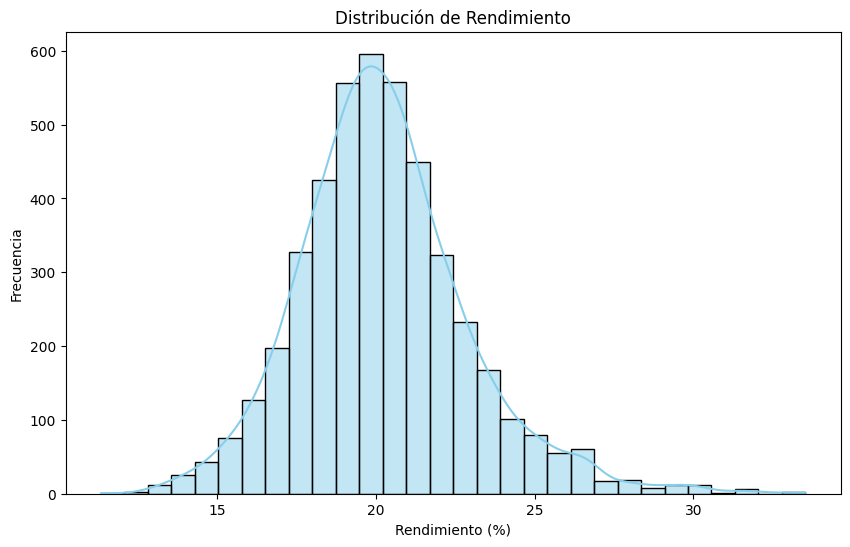

In [12]:
# Distribución de la variable objetivo 'Rendimiento'
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['Rendimiento'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Rendimiento')
plt.xlabel('Rendimiento (%)')
plt.ylabel('Frecuencia')
plt.show()

In [13]:
df_filtered['Rendimiento'].describe()

count    4495.000000
mean       20.242731
std         2.688779
min        11.335800
25%        18.542300
50%        20.035000
75%        21.649750
max        33.531200
Name: Rendimiento, dtype: float64

### NumVaciados

In [14]:
df_filtered['NumVaciados'].describe()

count    4495.000000
mean        5.559288
std         0.733512
min         4.000000
25%         5.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: NumVaciados, dtype: float64

### TEMB1 - TEMB8

In [15]:
temb_cols = [col for col in df_filtered.columns if 'TEMB' in col]
df_filtered[temb_cols].describe()

,TEMB1,TEMB2,TEMB3,TEMB4,TEMB5,TEMB6,TEMB7,TEMB8
count,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000
mean,59.894171,63.698354,70.055217,86.694994,42.432525,9.785184,1.898954,0.224472
std,5.942410,4.091109,5.509448,11.096475,45.892567,28.195832,13.167993,4.311226
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.200000,62.000000,68.700000,80.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,64.600000,70.000000,91.200000,0.000000,0.000000,0.000000,0.000000
75%,61.300000,65.200000,73.700000,95.000000,94.000000,0.000000,0.000000,0.000000
max,95.700000,81.500000,97.000000,100.000000,100.000000,100.000000,99.000000,96.000000


### PHB1 - PHB8

In [16]:
phb_cols = [col for col in df_filtered.columns if 'PHB' in col]
df_filtered[phb_cols].describe()

,PHB1,PHB2,PHB3,PHB4,PHB5,PHB6,PHB7,PHB8
count,4495.000000,4495.000000,4495.00000,4495.000000,4495.000000,4495.000000,4495.000000,4495.000000
mean,3.572992,3.868587,4.06089,4.210367,4.393259,1.943826,0.420067,0.091190
std,0.463655,0.435712,0.43367,0.487717,0.501113,2.246758,1.314717,0.642559
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,3.600000,3.80000,4.000000,4.200000,0.000000,0.000000,0.000000
50%,3.600000,3.900000,4.10000,4.300000,4.500000,0.000000,0.000000,0.000000
75%,3.800000,4.100000,4.30000,4.500000,4.700000,4.500000,0.000000,0.000000
max,9.200000,14.000000,6.50000,7.000000,7.600000,6.300000,6.100000,6.000000


### DrePh (descartada)

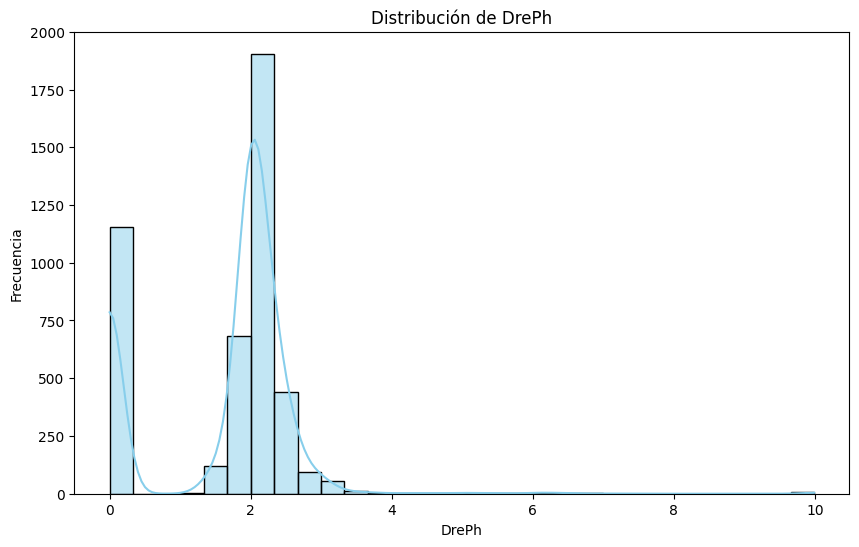

In [17]:
# Distribución de la variable objetivo 'Rendimiento'
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['DrePh'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de DrePh')
plt.xlabel('DrePh')
plt.ylabel('Frecuencia')
plt.show()

In [18]:
df_filtered['DrePh'].describe()

count    4495.000000
mean        1.608412
std         1.048426
min         0.000000
25%         0.000000
50%         2.000000
75%         2.160000
max         9.990000
Name: DrePh, dtype: float64

### PromHorasAlmacenamiento

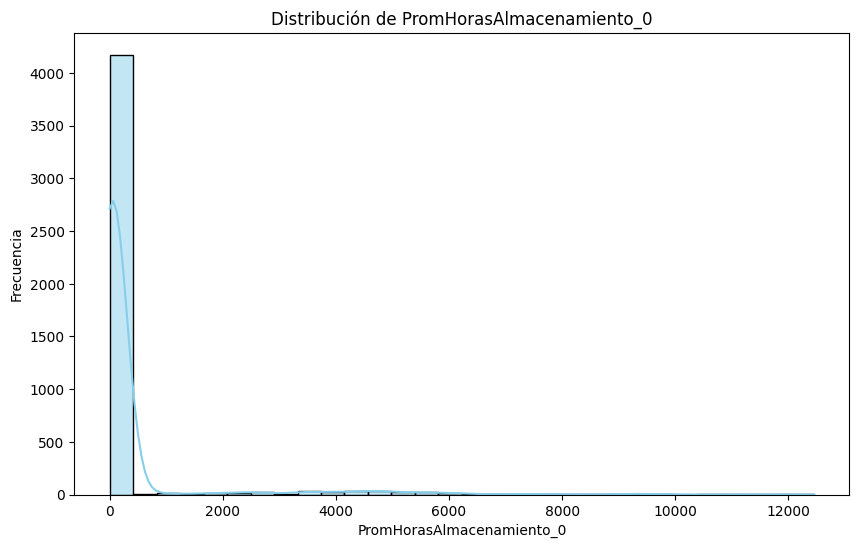

In [19]:
# Distribución de la variable objetivo 'Rendimiento'
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['PromHorasAlmacenamiento_0'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de PromHorasAlmacenamiento_0')
plt.xlabel('PromHorasAlmacenamiento_0')
plt.ylabel('Frecuencia')
plt.show()

In [20]:
df_filtered['PromHorasAlmacenamiento_0'].describe()

count     4495.000000
mean       375.551241
std       1304.984188
min          0.000000
25%         15.521848
50%         51.000000
75%        105.434504
max      12456.156665
Name: PromHorasAlmacenamiento_0, dtype: float64

### PrcPesoLote

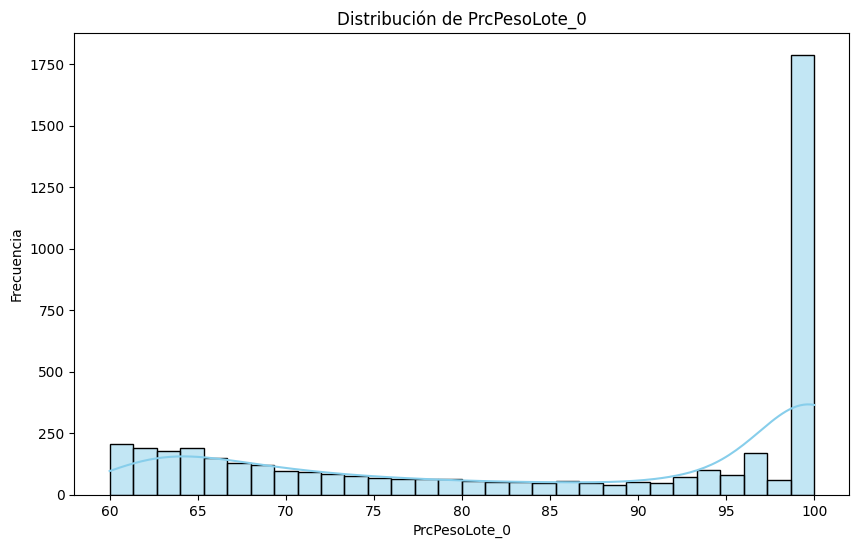

In [21]:
# Distribución de la variable objetivo 'Rendimiento'
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['PrcPesoLote_0'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de PrcPesoLote_0')
plt.xlabel('PrcPesoLote_0')
plt.ylabel('Frecuencia')
plt.show()

In [22]:
df_filtered['PrcPesoLote_0'].describe()

count    4495.000000
mean       85.291284
std        15.300472
min        60.002341
25%        68.935079
50%        92.397401
75%       100.000000
max       100.000000
Name: PrcPesoLote_0, dtype: float64

### PrcFresco

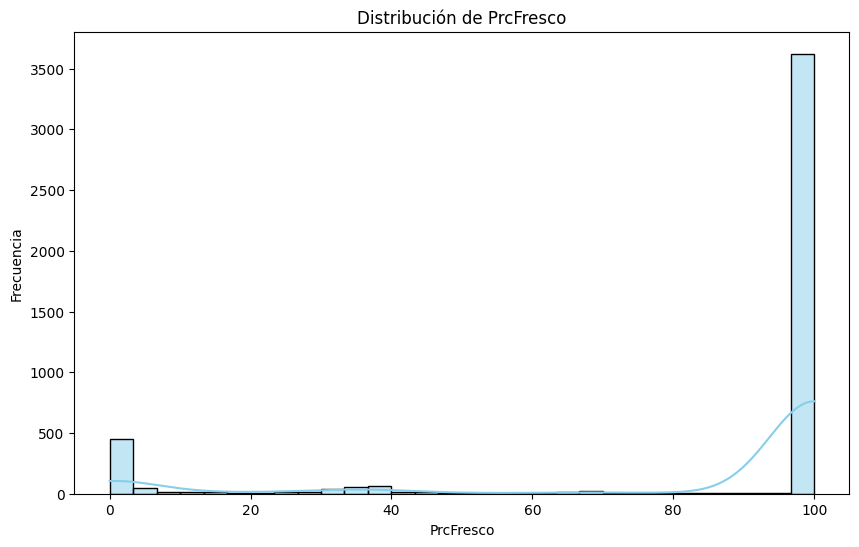

In [23]:
# Distribución de la variable 'PrcFresco'
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['PrcFresco'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de PrcFresco')
plt.xlabel('PrcFresco')
plt.ylabel('Frecuencia')
plt.show()

### MinAcido1, MinAcido2

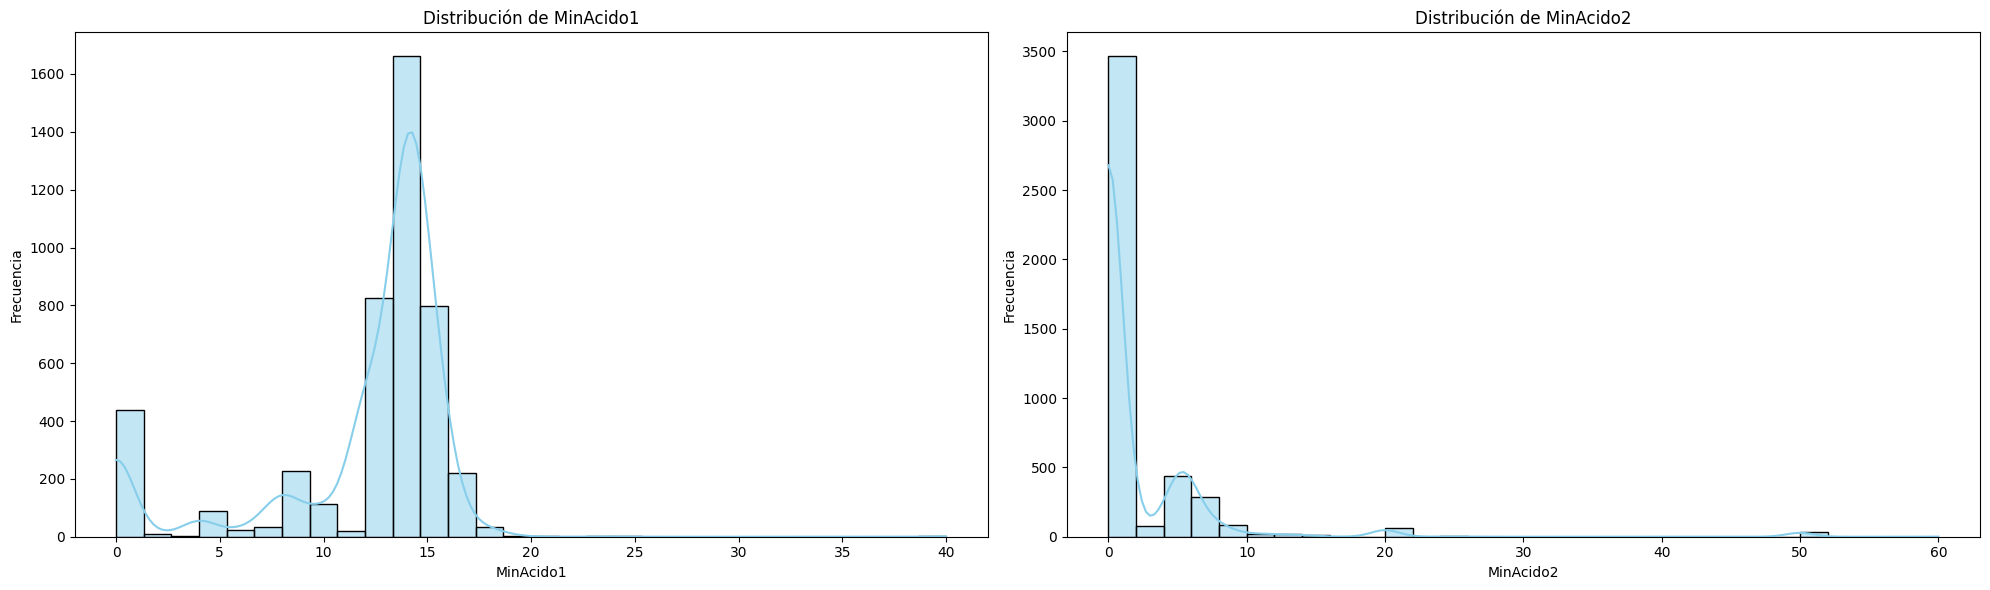

In [24]:
# Crear un lienzo con 2 subplots en una fila
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Distribución de la variable 'MinAcido1'
sns.histplot(df_filtered['MinAcido1'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de MinAcido1')
axes[0].set_xlabel('MinAcido1')
axes[0].set_ylabel('Frecuencia')

# Distribución de la variable 'MinAcido2'
sns.histplot(df_filtered['MinAcido2'], bins=30, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('Distribución de MinAcido2')
axes[1].set_xlabel('MinAcido2')
axes[1].set_ylabel('Frecuencia')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

In [25]:
df_filtered['MinAcido1'].describe()

count    4495.000000
mean       11.931257
std         4.606447
min         0.000000
25%        12.000000
50%        14.000000
75%        14.000000
max        40.000000
Name: MinAcido1, dtype: float64

In [26]:
df_filtered['MinAcido2'].describe()

count    4495.000000
mean        1.894549
std         5.548307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        60.000000
Name: MinAcido2, dtype: float64

### CodProveedor

In [27]:
len(set(df_filtered['CodProveedor_0']))

41

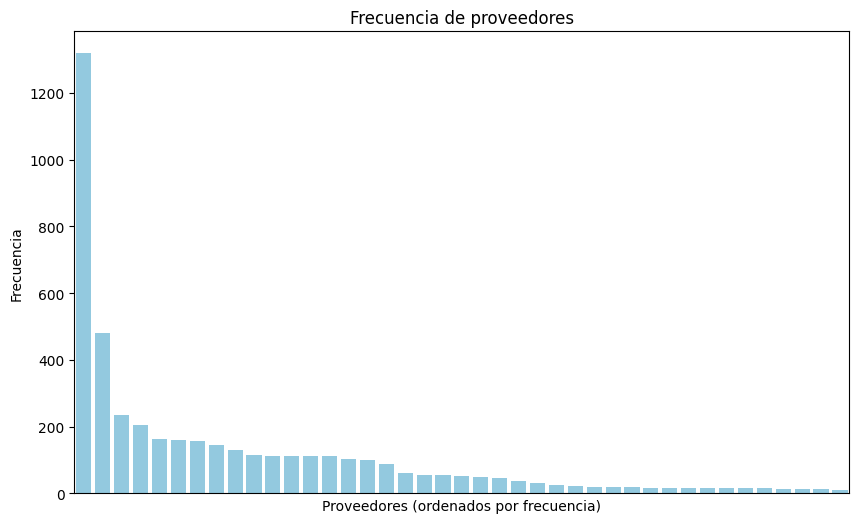

In [28]:
# Distribución de la variable 'CodProveedor_0'
plt.figure(figsize=(10,6))
sns.countplot(x='CodProveedor_0', data=df_filtered, order=df_filtered['CodProveedor_0'].value_counts().index, color='skyblue')
plt.title('Frecuencia de proveedores')
plt.xlabel('Proveedores (ordenados por frecuencia)')
plt.ylabel('Frecuencia')
plt.xticks([])
plt.show()

In [29]:
df_filtered['CodProveedor_0'].value_counts()

CodProveedor_0
11438     1318
10223      480
12211      235
11402      205
10686      163
10200      159
10502      156
10516      146
10563      131
10054      115
10248      113
11802      113
10685      113
11237      111
10206      103
11648      101
710931      87
10013       61
11492       55
11235       55
11491       52
10602       48
711280      45
10230       37
10228       30
10997       24
10625       22
10910       19
10271       19
711508      18
11451       17
11490       17
710101      16
11603       16
10212       15
10613       15
710007      15
10900       14
10623       13
711910      12
11803       11
Name: count, dtype: int64

### RelPromMPGRA

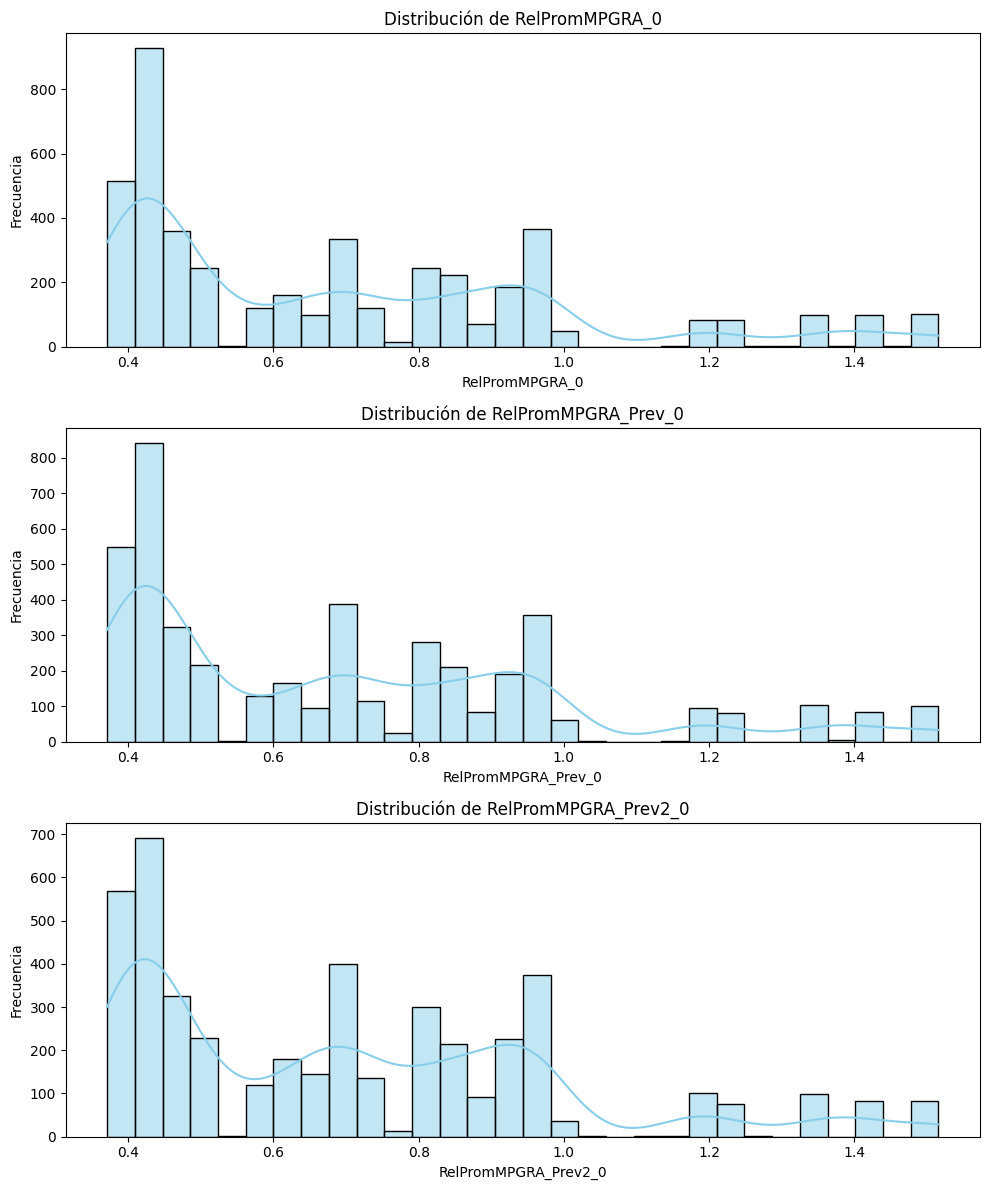

In [30]:
# Distribución de las variables 'RelPromMPGRA_0', 'RelPromMPGRA_Prev_0', 'RelPromMPGRA_Prev2_0'
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Distribución de RelPromMPGRA_0
sns.histplot(df_filtered['RelPromMPGRA_0'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Distribución de RelPromMPGRA_0')
axes[0].set_xlabel('RelPromMPGRA_0')
axes[0].set_ylabel('Frecuencia')

# Distribución de RelPromMPGRA_Prev_0
sns.histplot(df_filtered['RelPromMPGRA_Prev_0'], bins=30, kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('Distribución de RelPromMPGRA_Prev_0')
axes[1].set_xlabel('RelPromMPGRA_Prev_0')
axes[1].set_ylabel('Frecuencia')

# Distribución de RelPromMPGRA_Prev2_0
sns.histplot(df_filtered['RelPromMPGRA_Prev2_0'], bins=30, kde=True, color='skyblue', ax=axes[2])
axes[2].set_title('Distribución de RelPromMPGRA_Prev2_0')
axes[2].set_xlabel('RelPromMPGRA_Prev2_0')
axes[2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### Temp

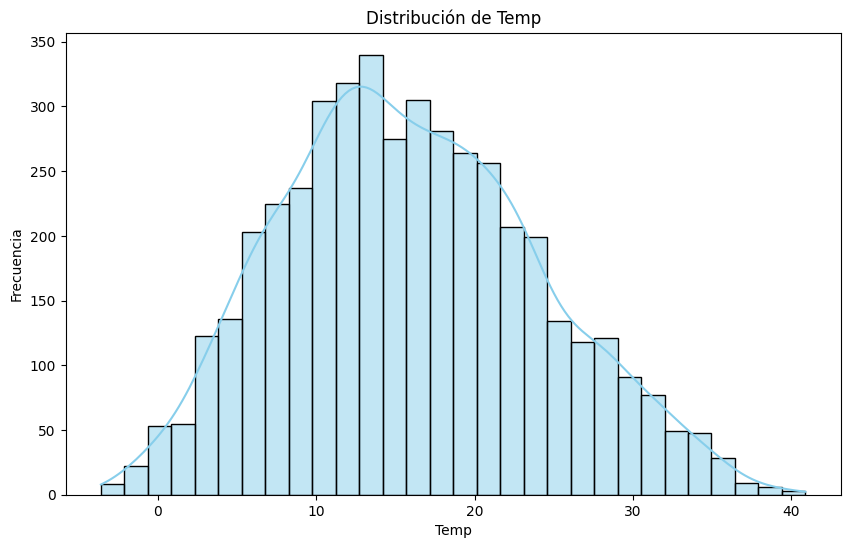

In [31]:
# Distribución de la variable 'Temp'
plt.figure(figsize=(10,6))
sns.histplot(df_filtered['Temp'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de Temp')
plt.xlabel('Temp')
plt.ylabel('Frecuencia')
plt.show()

### PrcCat1, PrcCat2, PrcCat3

In [32]:
df_filtered['PrcCat1'].mean(), df_filtered['PrcCat2'].mean(), df_filtered['PrcCat3'].mean()

(np.float64(5.982796440489432),
 np.float64(64.15709677419355),
 np.float64(29.860040044493882))

### CodExtractora

In [33]:
len(set(df_filtered['CodExtractora']))

10

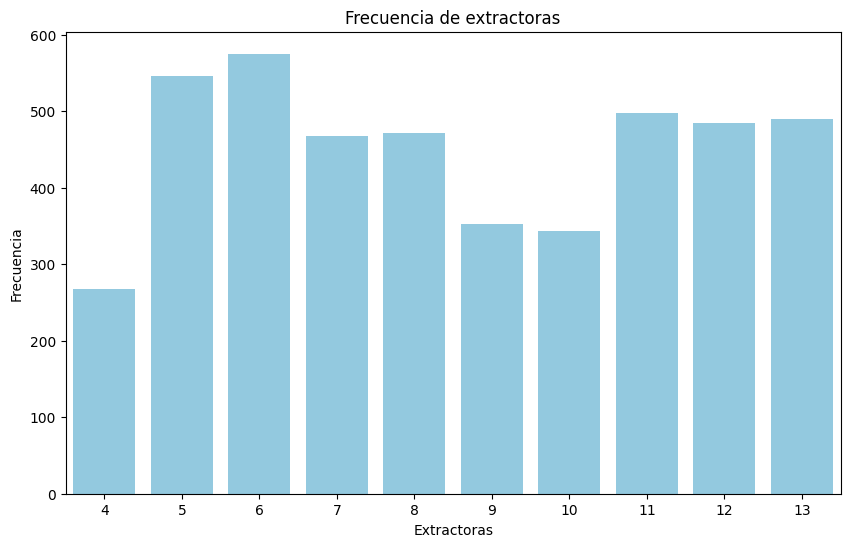

In [34]:
# Distribución de la variable 'CodExtractora'
plt.figure(figsize=(10,6))
sns.countplot(x='CodExtractora', data=df_filtered, color='skyblue')
plt.title('Frecuencia de extractoras')
plt.xlabel('Extractoras')
plt.ylabel('Frecuencia')
#plt.xticks([])
plt.show()

In [35]:
df_filtered['CodExtractora'].value_counts()

CodExtractora
6     575
5     546
11    497
13    490
12    485
8     472
7     468
9     352
10    343
4     267
Name: count, dtype: int64

# Desarrollo y entrenamiento de modelos

## Generación de datos sintéticos

In [36]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pandas as pd

class SyntheticDataGenerator:
    def __init__(self, min_value=11.0, max_value=51.0):
        self.min_value = min_value
        self.max_value = max_value
        self.scaler = StandardScaler()
                
    def generate_synthetic_data(self, X, y, n_synthetic_samples=None, target='target'):
        """
        Genera datos sintéticos usando principalmente generación basada en distribución.
        """
        if n_synthetic_samples is None:
            n_synthetic_samples = len(X)
        
        # Separar variables categóricas y numéricas
        X_cat = X.select_dtypes(include=['category'])
        X_num = X.select_dtypes(exclude=['category'])
        
        # Generar datos sintéticos en base a la distribución
        print("Generando datos basados en distribución...")
        X_num_synthetic, y_synthetic = self._generate_distribution_based(X_num, y, n_synthetic_samples)
        X_cat_synthetic = self._generate_synthetic_categorical_data(X_cat, n_synthetic_samples)
        
        # Combinar variables numéricas y categóricas
        X_synthetic = pd.concat([X_num_synthetic, X_cat_synthetic], axis=1)
        
        # Combinar con datos originales
        print("Combinando datos...")
        X_combined = pd.concat([X, X_synthetic], ignore_index=True)
        y_combined = np.concatenate([y, y_synthetic])
        
        # Validar y limpiar datos
        print("Validando y limpiando datos...")
        X_combined, y_combined = self._validate_and_clean(X_combined, y_combined)
        
        # Reordenar columnas como en el DataFrame original
        X_combined = X_combined[X.columns]
        
        # Verificar la calidad de los datos
        self._verify_quality(X, y, X_combined, y_combined)
        
        return X_combined, y_combined
    
    def _generate_synthetic_categorical_data(self, X_cat, n_samples):
        """
        Genera datos sintéticos para variables categóricas asumiendo que todas son de tipo entero.
        Mantiene la distribución original y asegura que el tipo de dato sea int64.
        
        Args:
            X_cat: DataFrame con las variables categóricas originales
            n_samples: Número de muestras sintéticas a generar
        
        Returns:
            DataFrame con datos categóricos sintéticos manteniendo las categorías y tipos originales
        """
        synthetic_data = pd.DataFrame()
        
        for column in X_cat.columns:
            # Obtener las categorías como enteros y sus frecuencias
            value_counts = X_cat[column].value_counts()
            
            # Calcular el número de muestras por categoría manteniendo las proporciones
            n_per_category = (value_counts / len(X_cat) * n_samples).round().astype(int)
            
            # Ajustar para asegurar que sumamos exactamente n_samples
            diff = n_samples - n_per_category.sum()
            if diff != 0:
                most_common_cat = value_counts.index[0]
                n_per_category[most_common_cat] += diff
            
            # Generar valores repitiendo cada categoría según su frecuencia
            synthetic_values = []
            for category, count in n_per_category.items():
                # Asegurar que cada categoría es int
                synthetic_values.extend([int(category)] * count)
            
            # Mezclar aleatoriamente los valores
            np.random.shuffle(synthetic_values)
            
            # Crear la serie categórica asegurando tipo int64 para las categorías
            categories = X_cat[column].cat.categories.astype('int64')
            synthetic_data[column] = pd.Categorical(
                np.array(synthetic_values, dtype='int64'),
                categories=categories,
                ordered=X_cat[column].cat.ordered
            )
        
        return synthetic_data
    
    def _generate_distribution_based(self, X, y, n_samples):
        """
        Genera datos sintéticos basados en la distribución de los datos numéricos originales
        """
        # Seleccionar solo columnas numéricas
        X_num = X.select_dtypes(exclude=['category'])
        
        if len(X_num.columns) == 0:
            return pd.DataFrame(index=range(n_samples)), y
        
        # Para las variables numéricas, usar kernel density estimation para mantener mejor la distribución
        X_synthetic = pd.DataFrame()
        for col in X_num.columns:
            kde = stats.gaussian_kde(X_num[col])
            X_synthetic[col] = kde.resample(n_samples)[0]
        
        # Para el target, usar también kernel density estimation
        kde_y = stats.gaussian_kde(y)
        y_synthetic = kde.resample(n_samples)[0]
        
        # Asegurar que los valores estén dentro de los límites físicos
        y_synthetic = np.clip(y_synthetic, self.min_value, self.max_value)
        
        return X_synthetic, y_synthetic
    
    def _validate_and_clean(self, X, y):
        """
        Valida y limpia los datos generados
        """
        # Eliminar valores atípicos extremos
        z_scores = np.abs(stats.zscore(y))
        valid_indices = z_scores < 3
        
        # Asegurar que los valores estén dentro de los límites físicos
        y = np.clip(y, self.min_value, self.max_value)
        
        return X[valid_indices].copy(), y[valid_indices].copy()
    
    def _verify_quality(self, X_orig, y_orig, X_combined, y_combined):
        """
        Verifica la calidad de los datos sintéticos generados
        """
        print("\nVerificación de calidad de datos sintéticos:")
        
        # Estadísticas básicas
        print("\nEstadísticas del target:")
        print(f"Original - Media: {np.mean(y_orig):.2f}, Std: {np.std(y_orig):.2f}")
        print(f"Combinado - Media: {np.mean(y_combined):.2f}, Std: {np.std(y_combined):.2f}")
        
        # Distribución por rangos
        bins = np.linspace(self.min_value, self.max_value, 10)
        hist_orig, _ = np.histogram(y_orig, bins=bins)
        hist_comb, _ = np.histogram(y_combined, bins=bins)
        
        print("\nDistribución por rangos:")
        for i in range(len(bins)-1):
            print(f"Rango {bins[i]:.1f}-{bins[i+1]:.1f}:")
            print(f"  Original: {hist_orig[i]}")
            print(f"  Combinado: {hist_comb[i]}")
        
        # Verificar distribución de variables categóricas
        categorical_columns = X_orig.select_dtypes(include=['category']).columns
        print("\nDistribución de variables categóricas:")
        for col in categorical_columns:
            print(f"\n{col}:")
            print("Original:", X_orig[col].value_counts().to_dict())
            print("Combinado:", X_combined[col].value_counts().to_dict())

## Preprocesador GMM

In [37]:
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class GMMPreprocessor(BaseEstimator, TransformerMixin):
    """
    Preprocesador que utiliza Gaussian Mixture Model para mejorar las predicciones.
    """
    def __init__(self, n_components=3, categorical_columns=None, numerical_columns=None):
        self.n_components = n_components
        self.categorical_columns = categorical_columns
        self.numerical_columns = numerical_columns
        self.gmm = None
        self.scaler = StandardScaler()
        self.feature_means = {}
        self.feature_stds = {}
        
    def _encode_categorical(self, X):
        """Codifica variables categóricas usando one-hot encoding."""
        return pd.get_dummies(X, columns=self.categorical_columns, drop_first=True)
    
    def _select_optimal_components(self, X, max_components=10):
        """Selecciona el número óptimo de componentes usando BIC."""
        bic = []
        n_components_range = range(1, max_components + 1)
        
        for n_components in n_components_range:
            gmm = GaussianMixture(
                n_components=n_components,
                random_state=42,
                covariance_type='full',
                n_init=10
            )
            gmm.fit(X)
            bic.append(gmm.bic(X))
        
        optimal_components = n_components_range[np.argmin(bic)]
        print(f"Número óptimo de componentes GMM: {optimal_components}")
        return optimal_components
    
    def fit(self, X, y=None):
        # Preprocesamiento inicial
        X_processed = X.copy()
        
        # Codificar variables categóricas
        if self.categorical_columns:
            X_processed = self._encode_categorical(X_processed)
        
        # Escalar variables numéricas
        if self.numerical_columns:
            X_num = X_processed[self.numerical_columns]
            X_processed[self.numerical_columns] = self.scaler.fit_transform(X_num)
            
            # Guardar medias y desviaciones estándar
            for col in self.numerical_columns:
                self.feature_means[col] = X_num[col].mean()
                self.feature_stds[col] = X_num[col].std()
        
        # Determinar número óptimo de componentes
        self.n_components = self._select_optimal_components(X_processed)
        
        # Ajustar GMM
        self.gmm = GaussianMixture(
            n_components=self.n_components,
            random_state=42,
            covariance_type='full',
            n_init=10
        )
        self.gmm.fit(X_processed)
        
        return self
    
    def transform(self, X):
        # Preprocesamiento inicial
        X_processed = X.copy()
        
        # Codificar variables categóricas
        if self.categorical_columns:
            X_processed = self._encode_categorical(X_processed)
        
        # Escalar variables numéricas
        if self.numerical_columns:
            X_num = X_processed[self.numerical_columns]
            X_processed[self.numerical_columns] = self.scaler.transform(X_num)
        
        # Obtener probabilidades de pertenencia a cada componente
        probs = self.gmm.predict_proba(X_processed)
        
        # Crear nuevas características basadas en GMM
        gmm_features = pd.DataFrame(
            probs,
            columns=[f'gmm_prob_{i}' for i in range(self.n_components)],
            index=X.index
        )
        
        # Identificar el componente más probable
        most_likely_component = pd.Series(
            self.gmm.predict(X_processed),
            index=X.index,
            name='gmm_component'
        )
        
        # Calcular distancias a los centros de los componentes
        centers = self.gmm.means_
        distances = []
        for i in range(self.n_components):
            diff = X_processed - centers[i]
            dist = np.sqrt(np.sum(diff ** 2, axis=1))
            distances.append(dist)
        
        distances_df = pd.DataFrame(
            np.column_stack(distances),
            columns=[f'gmm_distance_{i}' for i in range(self.n_components)],
            index=X.index
        )
        
        # Combinar todas las características
        X_transformed = pd.concat(
            [X, gmm_features, distances_df, most_likely_component],
            axis=1
        )
        
        return X_transformed
    
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

def create_gmm_preprocessing_pipeline(X, categorical_columns, numerical_columns):
    """
    Crea un pipeline de preprocesamiento que incluye GMM.
    """
    gmm_preprocessor = GMMPreprocessor(
        categorical_columns=categorical_columns,
        numerical_columns=numerical_columns
    )
    
    # Ajustar y transformar los datos
    X_transformed = gmm_preprocessor.fit_transform(X)
    
    return gmm_preprocessor, X_transformed

## Diseño de modelos y preprocesado

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras import regularizers
from sklearn.base import BaseEstimator, TransformerMixin
from interpret.glassbox import ExplainableBoostingRegressor
from interpret import show
import time

# Configuración de TensorFlow para manejo de memoria más conservador
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


class TargetTransformer(BaseEstimator, TransformerMixin):
    """
    Transformer para normalizar y desnormalizar la variable objetivo (target).
    Mantiene los valores mínimos y máximos para poder revertir la transformación.
    """
    def __init__(self):
        self.min_val = None
        self.max_val = None
    
    def fit(self, y):
        """
        Guarda los valores mínimos y máximos del target
        """
        self.min_val = y.min()
        self.max_val = y.max()
        return self
    
    def transform(self, y):
        """
        Normaliza el target al rango [0,1]
        """
        return (y - self.min_val) / (self.max_val - self.min_val)
    
    def inverse_transform(self, y):
        """
        Revierte la normalización
        """
        return y * (self.max_val - self.min_val) + self.min_val


def manual_cross_validate_nn(model_class, X, y, cv=5):
    """
    Implementa validación cruzada manual para la red neuronal
    """
    kf = KFold(n_splits=cv, shuffle=True, random_state=42)
    scores = []
    models = []
    
    # Convertir y a numpy array si es pandas Series
    if isinstance(y, pd.Series):
        y = y.values
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X)):
        print(f"Entrenando fold {fold + 1}/{cv}")
        X_train_fold, X_val_fold = X[train_idx], X[val_idx]
        y_train_fold, y_val_fold = y[train_idx], y[val_idx]
        
        # Crear y entrenar un nuevo modelo para cada fold
        model = model_class()
        model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold))
        
        # Calcular RMSE para este fold
        y_pred = model.predict(X_val_fold)
        rmse = np.sqrt(mean_squared_error(y_val_fold, y_pred))
        scores.append(rmse)
        models.append(model)
    
    # Encontrar el mejor modelo
    best_model_idx = np.argmin(scores)
    return np.array(scores), models[best_model_idx]


class CategoricalEmbeddingTransformer(BaseEstimator, TransformerMixin):
    """
    Transformador que aplica embedding a variables categóricas.

    Args:
        BaseEstimator (_type_): _description_
        TransformerMixin (_type_): _description_
    """
    
    def __init__(self, categorical_columns, unknown_value='unknown'):
        self.categorical_columns = categorical_columns
        self.label_encoders = {}
        self.embedding_models = {}
        self.unknown_value = unknown_value
        self.embedding_dims = {}
        
    def calculate_embedding_dim(self, n_categories):
        """
        Calcula la dimensión óptima del embedding basado en el número de categorías.
        Fórmula recomendada: min(600, round(1.6 * n_categories**0.56))
        Ref: https://forums.fast.ai/t/embedding-layer-size-rule/50691
        """
        return min(600, round(1.6 * n_categories**0.56))
        
    def fit(self, X, y=None):
        for col in self.categorical_columns:
            # Agregar valor unknown a los datos de entrenamiento
            unique_values = np.append(X[col].unique(), self.unknown_value)
            n_categories = len(unique_values)
            
            # Calcular dimensión óptima del embedding
            self.embedding_dims[col] = self.calculate_embedding_dim(n_categories)
            print(f"Dimensión de embedding para {col}: {self.embedding_dims[col]} (n_categories: {n_categories})")
            
            le = LabelEncoder()
            le.fit(unique_values.astype(str))
            self.label_encoders[col] = le
            
            embedding_model = MLPRegressor(
                hidden_layer_sizes=(n_categories, self.embedding_dims[col]),
                max_iter=1000,
                random_state=42
            )
            
            encoded_values = le.transform(X[col].astype(str))
            one_hot = np.eye(n_categories)[encoded_values]
            target = np.random.random((len(encoded_values), self.embedding_dims[col]))
            embedding_model.fit(one_hot, target)
            self.embedding_models[col] = embedding_model
            
        return self
    
    def transform(self, X):
        embeddings = []
        for col in self.categorical_columns:
            X_col = X[col].astype(str)
            mask = ~np.isin(X_col, self.label_encoders[col].classes_)
            X_col[mask] = self.unknown_value
            
            encoded_values = self.label_encoders[col].transform(X_col)
            one_hot = np.eye(len(self.label_encoders[col].classes_))[encoded_values]
            embedding = self.embedding_models[col].predict(one_hot)
            embeddings.append(embedding)
        
        result = np.hstack(embeddings)
        
        column_names = [
            f"{col}_emb_{i}" 
            for col in self.categorical_columns 
            for i in range(self.embedding_dims[col])
        ]
        
        return pd.DataFrame(result, columns=column_names, index=X.index)


def create_preprocessing_pipeline(numerical_columns, categorical_columns):
    numeric_transformer = StandardScaler()
    categorical_transformer = CategoricalEmbeddingTransformer(
        categorical_columns=categorical_columns
    )
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numerical_columns),
            ('cat', categorical_transformer, categorical_columns)
        ])
    
    return preprocessor

def get_transformed_column_names(preprocessor, df, numerical_columns, categorical_columns):
    numeric_features = numerical_columns
    categorical_features = [
        f"{col}_emb_{i}" 
        for col in categorical_columns 
        for i in range(preprocessor.named_transformers_['cat'].embedding_dims[col])
    ]
    return numeric_features + categorical_features


def load_and_prepare_data(df, target, categorical_columns, numerical_columns):
    X = df[categorical_columns + numerical_columns]
    y = df[target]
    return train_test_split(X, y, test_size=0.2, random_state=42)

def train_and_evaluate_models(X_train_transformed, X_test_transformed, y_train, y_test, target_transformer, selected_models, params=None):
    
    # Normalización del target
    y_train_normalized = target_transformer.fit(y_train).transform(y_train)
    y_test_normalized = target_transformer.transform(y_test)
    
    if isinstance(X_train_transformed, pd.DataFrame):
        X_train_transformed = X_train_transformed.values
    if isinstance(X_test_transformed, pd.DataFrame):
        X_test_transformed = X_test_transformed.values
    
    if params is None:
        models = {
            'Linear Regression': LinearRegression(),
            'Random Forest': RandomForestRegressor(
                n_estimators=2000,
                max_depth=20,
                min_samples_split=5,
                min_samples_leaf=4,
                max_features='sqrt',
                n_jobs=-1,
                random_state=42,
                bootstrap=True
            ),
            'XGBoost': xgb.XGBRegressor(
                n_estimators=2000,
                max_depth=20,
                learning_rate=0.01,
                min_child_weight=3,
                subsample=0.8,
                colsample_bytree=0.8,
                gamma=0.1,
                reg_alpha=0.1,
                reg_lambda=1,
                random_state=42,
                tree_method='hist',
                n_jobs=-1,
                eval_metric='rmse'
            ),
            'EBM': ExplainableBoostingRegressor(
                outer_bags=8,
                inner_bags=4,
                learning_rate=0.01,
                max_rounds=5000,
                min_samples_leaf=4,
                max_leaves=8,
                interactions=6,
                n_jobs=-1,
                random_state=42
            )
        }
    else:
        rf_params = {**params['random_forest'], 'random_state': 42, 'n_jobs': -1} if 'random_forest' in params.keys() else {
            'n_estimators': 2000,
            'max_depth': 20,
            'min_samples_split': 5,
            'min_samples_leaf': 4,
            'max_features': 'sqrt',
            'n_jobs': -1,
            'random_state': 42,
            'bootstrap': True}
        xgb_params = {**params['xgboost'], 'random_state': 42, 'tree_method': 'hist', 'n_jobs': -1, 'eval_metric': 'rmse'} if 'xgboost' in params.keys() else {
            'n_estimators': 2000,
            'max_depth': 10,
            'learning_rate': 0.01,
            'min_child_weight': 3,
            'subsample': 0.8,
            'colsample_bytree': 0.8,
            'gamma': 0.1,
            'reg_alpha': 0.1,
            'reg_lambda': 1,
            'random_state': 42,
            'tree_method': 'hist',
            'n_jobs': -1,
            'eval_metric': 'rmse'}
        ebm_params = {**params['ebm'], 'random_state': 42, 'n_jobs': -1} if 'ebm' in params.keys() else {
            'outer_bags': 8,
            'inner_bags': 4,
            'learning_rate': 0.01,
            'max_rounds': 5000,
            'min_samples_leaf': 4,
            'max_leaves': 8,
            'interactions': 6,
            'random_state': 42,
            'n_jobs': -1
        }
        
        models = {
            'Linear Regression': LinearRegression(),
            'Random Forest': RandomForestRegressor(
                **rf_params
            ),
            'XGBoost': xgb.XGBRegressor(
                **xgb_params
            ),
            'EBM': ExplainableBoostingRegressor(
                **ebm_params
            )
        }
    
    results = {}
    best_models = {}
    
    # Deja sólo los modelos seleccionados
    models = {name: model for name, model in models.items() if name in selected_models}
    
    for name, model in models.items():
        print(f"\n{name.upper()}")
        print(f"\nEntrenando {name}:")
        
        initial_time = time.time()
        # Validación cruzada normal para otros modelos
        cv_scores = cross_validate(
            model, X_train_transformed, y_train_normalized,
            cv=5, 
            scoring={'rmse': 'neg_root_mean_squared_error',
                    'mae': 'neg_mean_absolute_error',
                    'r2': 'r2'},
            return_estimator=True,
            n_jobs=-1
        )
        
        rmse_scores = -cv_scores['test_rmse']
        best_model_idx = np.argmin(rmse_scores)
        best_model = cv_scores['estimator'][best_model_idx]
        y_pred_normalized = best_model.predict(X_test_transformed)
        y_pred = target_transformer.inverse_transform(y_pred_normalized)
        final_time = time.time()
        
        print(f"CV RMSE scores: {rmse_scores}")
        print(f"Mean CV RMSE: {rmse_scores.mean():.4f}")
        
        final_metrics = {
            'rmse': np.sqrt(mean_squared_error(y_test, y_pred)),
            'mae': mean_absolute_error(y_test, y_pred),
            'r2': r2_score(y_test, y_pred)
        }
        
        results[name] = {
            'cv_rmse_scores': rmse_scores,
            'cv_rmse_mean': rmse_scores.mean(),
            'best_model_metrics': final_metrics
        }
        best_models[name] = best_model
        
        print("\nMétricas del mejor modelo:")
        for metric, value in final_metrics.items():
            print(f"{metric.upper()}: {value:.4f}")
        
        print(f"\nTiempo de entrenamiento: {final_time - initial_time:.2f} segundos")
    
    return best_models, results

W0000 00:00:1734260438.496002  888874 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


## Función de visualización

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import ceil

def plot_predictions_vs_actual(y_true, y_pred, model_name, ax=None):
    """
    Crea un gráfico de dispersión de predicciones vs valores reales para un modelo específico.
    
    Args:
        y_true: Valores reales
        y_pred: Predicciones del modelo
        model_name: Nombre del modelo para el título
        ax: Eje de matplotlib donde graficar. Si es None, se crea uno nuevo.
    """
    if ax is None:
        _, ax = plt.subplots(figsize=(8, 6))
    
    # Crear el gráfico de dispersión
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.5, ax=ax)
    
    # Añadir línea de referencia y=x
    min_val = min(10, 40)
    max_val = max(10, 40)
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Línea de referencia (y=x)')
    
    # Calcular R²
    r2 = np.corrcoef(y_true, y_pred)[0, 1]**2
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    # Configurar el gráfico
    ax.set_title(f'{model_name}\nR² = {r2:.4f}\nMAE = {mae:.4f}\nMSE = {mse:.4f}\nRMSE = {rmse:.4f}')
    ax.set_xlabel('Valores reales')
    ax.set_ylabel('Predicciones')
    ax.set_ylim(min_val - 2, max_val + 2)
    ax.set_xlim(min_val - 2, max_val + 2)
    ax.legend()
    
    # Ajustar los límites para que sean iguales en ambos ejes
    ax.set_aspect('equal')
    return ax

def visualize_all_models_predictions(trained_models, X_test_transformed, y_test, target_transformer):
    """
    Crea un panel de gráficos comparando las predicciones de todos los modelos.
    
    Args:
        trained_models: Diccionario con los modelos entrenados
        X_test: Datos de prueba
        y_test: Valores reales de prueba
    """
    # Calcular el número de filas necesarias (3 columnas)
    n_models = len(trained_models)
    n_cols = 2
    n_rows = ceil(n_models / n_cols)
    
    # Crear la figura
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle('Comparación de Predicciones vs Valores Reales', 
                fontsize=16, y=1.02)
    
    # Aplanar el array de ejes si hay múltiples filas
    if n_rows > 1:
        axes = axes.flatten()
    elif n_rows == 1:
        axes = [axes] if n_models == 1 else axes
    
    # Iterar sobre los modelos y crear los gráficos
    for i, (name, model) in enumerate(trained_models.items()):
        y_pred_normalized = model.predict(X_test_transformed)
        y_pred = target_transformer.inverse_transform(y_pred_normalized)
        
        # Crear el gráfico
        plot_predictions_vs_actual(y_test, y_pred, name, ax=axes[i])
    
    # Ocultar los subplots vacíos si los hay
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    # Ajustar el espaciado
    plt.tight_layout()
    plt.show()

## Función de análisis de modelo EBM

In [40]:
# Análisis del modelo EBM
def analyze_ebm_model(ebm_model, feature_names, X_test):
    """
    Analiza y muestra las explicaciones del modelo EBM, manejando correctamente
    las características originales y los términos de interacción
    """
    # Obtener explicaciones globales
    global_explanations = ebm_model.explain_global()
    scores = global_explanations.data()['scores']
    
    # Imprimir información de diagnóstico
    print("\nInformación de diagnóstico:")
    print(f"Número de características en X_test: {X_test.shape[1]}")
    print(f"Número de nombres de características: {len(feature_names)}")
    print(f"Número total de scores (incluyendo interacciones): {len(scores)}")
    
    # Imprimir importancia de características principales
    print("\nImportancia de características principales según EBM:")
    feature_importance = {}
    for i in range(len(feature_names)):
        feature_importance[feature_names[i]] = scores[i]
        print(f"{feature_names[i]}: {scores[i]:.4f}")
    
    # Imprimir términos de interacción si existen
    if len(scores) > len(feature_names):
        print("\nTérminos de interacción detectados:")
        for i in range(len(feature_names), len(scores)):
            print(f"Interacción {i-len(feature_names)}: {scores[i]:.4f}")
    
    # Obtener las características más importantes
    sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
    print("\nTop 20 características más importantes:")
    for feature, importance in sorted_features[:20]:
        print(f"{feature}: {importance:.4f}")
    
    # Obtener explicaciones locales para algunas muestras
    local_explanations = ebm_model.explain_local(X_test[:5])
    
    return global_explanations, local_explanations, feature_importance

## Función de optimización de hiperparámetros

In [41]:
import optuna
import joblib
from sklearn.model_selection import cross_val_score
import numpy as np
from math import sqrt
import json
import os

def optimize_random_forest(X_train, y_train, X_test, y_test, target_transformer, n_trials=100):
    """
    Optimiza los hiperparámetros de Random Forest usando Optuna.
    Se evalúa el modelo en un conjunto de prueba en lugar de usar validación cruzada.
    """
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 3000),
            'max_depth': trial.suggest_int('max_depth', 5, 30),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 15),
            'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
        }
        
        model = RandomForestRegressor(
            bootstrap=True,
            random_state=42,
            n_jobs=-1,
            **params
        )
        
        # Entrenar el modelo con el conjunto de entrenamiento
        y_train_normalized = target_transformer.fit(y_train).transform(y_train)
        model.fit(X_train, y_train_normalized)
        
        # Evaluar el modelo en el conjunto de prueba
        y_pred_normalized = model.predict(X_test)
        y_pred = target_transformer.inverse_transform(y_pred_normalized)
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        
        print(f"\nProbando parámetros RF: {params}")
        print(f"RMSE: {rmse:.4f}")
        
        return rmse

    study = optuna.create_study(direction='minimize')
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study.optimize(objective, n_trials=n_trials)
    
    print("\nMejores parámetros encontrados para Random Forest:")
    print(study.best_params)
    print(f"Mejor RMSE: {study.best_value:.4f}")
    
    # Guardar los mejores parámetros
    save_best_params('random_forest', study.best_params)
    
    return study.best_params

def optimize_xgboost(X_train, y_train, X_test, y_test, target_transformer, n_trials=100):
    """
    Optimiza los hiperparámetros de XGBoost usando Optuna.
    Se evalúa el modelo en un conjunto de prueba en lugar de usar validación cruzada.
    """
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 500, 3000),
            'max_depth': trial.suggest_int('max_depth', 3, 30),
            'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
            'min_child_weight': trial.suggest_int('min_child_weight', 2, 10),
            'subsample': trial.suggest_float('subsample', 0.7, 0.9),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 0.9),
            'gamma': trial.suggest_float('gamma', 0.05, 0.15, log=True),
            'reg_alpha': trial.suggest_float('reg_alpha', 0.05, 0.15, log=True),
            'reg_lambda': trial.suggest_float('reg_lambda', 1.0, 3.0, log=True),
        }

        model = xgb.XGBRegressor(
            random_state=42,
            tree_method='hist',
            n_jobs=-1,
            eval_metric='rmse',
            **params
        )
        
        # Entrenar el modelo con el conjunto de entrenamiento
        y_train_normalized = target_transformer.fit(y_train).transform(y_train)
        model.fit(X_train, y_train_normalized)
        
        # Evaluar el modelo en el conjunto de prueba
        y_pred_normalized = model.predict(X_test)
        y_pred = target_transformer.inverse_transform(y_pred_normalized)
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        
        print(f"\nProbando parámetros XGB: {params}")
        print(f"RMSE: {rmse:.4f}")
        
        return rmse

    study = optuna.create_study(direction='minimize')
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study.optimize(objective, n_trials=n_trials)
    
    print("\nMejores parámetros encontrados para XGBoost:")
    print(study.best_params)
    print(f"Mejor RMSE: {study.best_value:.4f}")
    
    save_best_params('xgboost', study.best_params)
    
    return study.best_params

def optimize_ebm(X_train, y_train, X_test, y_test, target_transformer, n_trials=100):
    """
    Optimiza los hiperparámetros de EBM usando Optuna.
    Se evalúa el modelo en un conjunto de prueba en lugar de usar validación cruzada.
    """
    def objective(trial):
        params = {
            'outer_bags': trial.suggest_int('outer_bags', 4, 32),
            'inner_bags': trial.suggest_int('inner_bags', 2, 16),
            'learning_rate': trial.suggest_float('learning_rate', 0.001, 0.05, log=True),
            'max_rounds': trial.suggest_int('max_rounds', 3000, 10000),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 2, 30),
            'max_leaves': trial.suggest_int('max_leaves', 3, 32),
            'interactions': trial.suggest_int('interactions', 0, 5)
        }

        model = ExplainableBoostingRegressor(
            random_state=42,
            n_jobs=-1,
            **params
        )
        
        # Entrenar el modelo con el conjunto de entrenamiento
        y_train_normalized = target_transformer.fit(y_train).transform(y_train)
        model.fit(X_train, y_train_normalized)
        
        # Evaluar el modelo en el conjunto de prueba
        y_pred_normalized = model.predict(X_test)
        y_pred = target_transformer.inverse_transform(y_pred_normalized)
        rmse = sqrt(mean_squared_error(y_test, y_pred))
        
        print(f"\nProbando parámetros EBM: {params}")
        print(f"RMSE: {rmse:.4f}")
        
        return rmse

    study = optuna.create_study(direction='minimize')
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study.optimize(objective, n_trials=n_trials)
    
    print("\nMejores parámetros encontrados para EBM:")
    print(study.best_params)
    print(f"Mejor RMSE: {study.best_value:.4f}")
    
    save_best_params('ebm', study.best_params)
    
    return study.best_params

def save_best_params(model_name, params, directory='best_params'):
    """
    Guarda los mejores parámetros en un archivo JSON.
    """
    if not os.path.exists(directory):
        os.makedirs(directory)
        
    file_path = os.path.join(directory, f'{model_name}_params.json')
    with open(file_path, 'w') as f:
        json.dump(params, f, indent=4)

def load_best_params(model_name, directory='best_params'):
    """
    Carga los mejores parámetros desde un archivo JSON.
    """
    file_path = os.path.join(directory, f'{model_name}_params.json')
    if os.path.exists(file_path):
        with open(file_path, 'r') as f:
            return json.load(f)
    return None

def optimize_all_models(X_train, y_train, X_test, y_test, target_transformer, n_trials=100):
    """
    Optimiza todos los modelos y devuelve sus mejores parámetros.
    """
    best_params = {}
    
    print("Optimizando Random Forest...")
    best_params['random_forest'] = optimize_random_forest(X_train, y_train, X_test, y_test, target_transformer, n_trials)
    
    print("\nOptimizando XGBoost...")
    best_params['xgboost'] = optimize_xgboost(X_train, y_train, X_test, y_test, target_transformer, n_trials)
    
    print("\nOptimizando EBM...")
    best_params['ebm'] = optimize_ebm(X_train, y_train, X_test, y_test, target_transformer, n_trials)
    
    return best_params

## Modelos con categoría visual

### Procesamiento de datos

In [42]:
# Definir columnas a utilizar
categorical_columns = ['CodExtractora'] # 'TipoMacerado', 'TipoAcido'
for i in range(num_suppliers):
    categorical_columns += [f'CodProveedor_{i}']
    
numerical_columns = ['PrcFresco', 'MinAcido1', 'MinAcido2', 'Temp', 'NumVaciados',
                     'TEMB1', 'TEMB2', 'TEMB3', 'TEMB4', 'TEMB5', 'TEMB6', 'TEMB7', 'TEMB8',
                     'PHB1', 'PHB2', 'PHB3', 'PHB4', 'PHB5', 'PHB6', 'PHB7', 'PHB8',
                     'PrcCat1', 'PrcCat2', 'PrcCat3'
                     ]
for i in range(num_suppliers):
    numerical_columns += [f'RelPromMPGRA_{i}', f'RelPromMPGRA_Prev_{i}', f'RelPromMPGRA_Prev2_{i}', f'PromHorasAlmacenamiento_{i}', f'PrcPesoLote_{i}']
target = 'Rendimiento'

# Reasigna las variables categóricas como categóricas
df_filtered[categorical_columns] = df_filtered[categorical_columns].astype('category')

# Cargar y dividir datos
print("\nCargando datos...")
X_train, X_test, y_train, y_test = load_and_prepare_data(df_filtered, target, categorical_columns, numerical_columns)

# Generar datos sintéticos

n_synthetic_samples = 0 #int(len(X_train)/2)

print("\nGenerando datos sintéticos...")
synthetic_generator = SyntheticDataGenerator(
    min_value=y_train.min(),
    max_value=y_train.max()
)

if n_synthetic_samples == 0:
    X_train_augmented, y_train_augmented = X_train, y_train
else:
    X_train_augmented, y_train_augmented = synthetic_generator.generate_synthetic_data(
        X_train, y_train,
        n_synthetic_samples=n_synthetic_samples,
        target=target
    )

use_gmm = False

if use_gmm:
    # Crear y aplicar el preprocesador GMM
    print("\nCreando preprocesador GMM...")
    gmm_preprocessor, X_train_gmm = create_gmm_preprocessing_pipeline(
        X_train_augmented, 
        categorical_columns=categorical_columns,
        numerical_columns=numerical_columns
    )

    # Transformar datos de prueba
    print("\nTransformando datos de prueba...")
    X_test_gmm = gmm_preprocessor.transform(X_test)
else:
    X_train_gmm, X_test_gmm = X_train_augmented, X_test

# Crear pipeline normal
preprocessor = create_preprocessing_pipeline(numerical_columns, categorical_columns)
target_transformer = TargetTransformer()


print("\nPreparando datos...")
X_train_transformed = preprocessor.fit_transform(X_train_gmm)
X_test_transformed = preprocessor.transform(X_test_gmm)

if use_gmm:
    gmm_features = [col for col in X_train_gmm.columns if col not in categorical_columns and col not in numerical_columns]
    X_train_transformed = np.concatenate((X_train_transformed, X_train_gmm[gmm_features].values), axis=1)
    X_test_transformed = np.concatenate((X_test_transformed, X_test_gmm[gmm_features].values), axis=1)


Cargando datos...

Generando datos sintéticos...

Preparando datos...
Dimensión de embedding para CodExtractora: 6 (n_categories: 11)
Dimensión de embedding para CodProveedor_0: 13 (n_categories: 42)


### Entrenamiento

In [43]:
# Entrenar y evaluar modelos
selected_models = [
    'Linear Regression',
    'Random Forest',
    'XGBoost',
    #'Gradient Boosting',
    'EBM',
    #'Neural Network'
]

trained_models, results = train_and_evaluate_models(
    X_train_transformed, X_test_transformed, y_train_augmented, y_test, target_transformer, selected_models
)


LINEAR REGRESSION

Entrenando Linear Regression:
CV RMSE scores: [0.0996697  0.10494254 0.10240099 0.10710381 0.1026415 ]
Mean CV RMSE: 0.1034

Métricas del mejor modelo:
RMSE: 2.1084
MAE: 1.6409
R2: 0.3644

Tiempo de entrenamiento: 1.42 segundos

RANDOM FOREST

Entrenando Random Forest:
CV RMSE scores: [0.08509618 0.08803992 0.08458094 0.08904177 0.08733394]
Mean CV RMSE: 0.0868

Métricas del mejor modelo:
RMSE: 1.7528
MAE: 1.3411
R2: 0.5607

Tiempo de entrenamiento: 8.11 segundos

XGBOOST

Entrenando XGBoost:
CV RMSE scores: [0.08764903 0.09234531 0.08762112 0.09257935 0.09034161]
Mean CV RMSE: 0.0901

Métricas del mejor modelo:
RMSE: 1.8301
MAE: 1.4086
R2: 0.5211

Tiempo de entrenamiento: 4.22 segundos

EBM

Entrenando EBM:
CV RMSE scores: [0.08567237 0.08962558 0.08568423 0.09211279 0.08743598]
Mean CV RMSE: 0.0881

Métricas del mejor modelo:
RMSE: 1.7860
MAE: 1.3783
R2: 0.5439

Tiempo de entrenamiento: 16.46 segundos


### Análisis de resultados

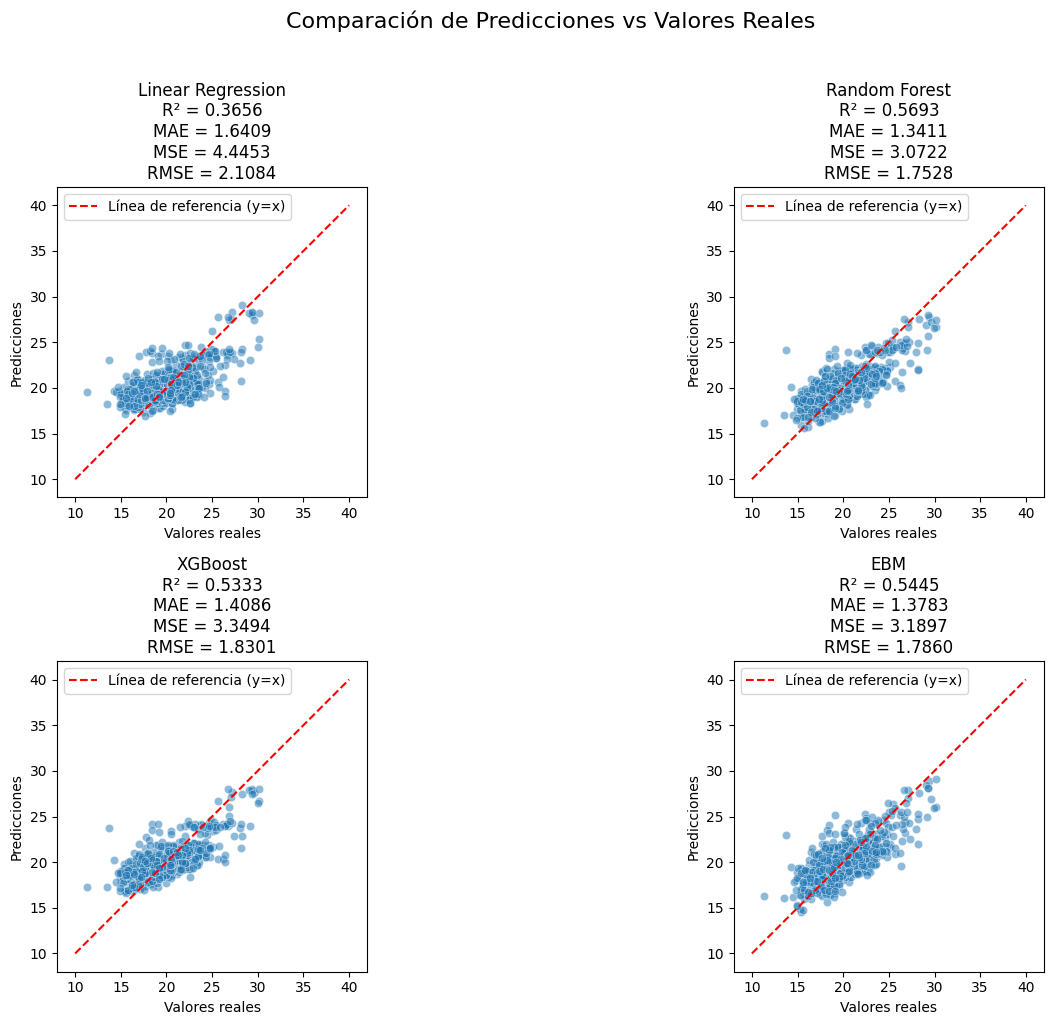

In [44]:
visualize_all_models_predictions(trained_models, X_test_transformed, y_test, target_transformer)

In [45]:
if 'EBM' in results:
    print("\nAnálisis del modelo EBM:")
    print("\nMétricas de rendimiento:")
    print(results['EBM']['best_model_metrics'])
    
    # Analizar el modelo
    ebm_model = trained_models['EBM']
    if use_gmm:
        feature_names = get_transformed_column_names(preprocessor, X_train_gmm, numerical_columns, categorical_columns) + gmm_features
    else:
        feature_names = get_transformed_column_names(preprocessor, X_train_gmm, numerical_columns, categorical_columns)
    global_exp, local_exp, feature_importance = analyze_ebm_model(ebm_model, feature_names, X_test_transformed)


Análisis del modelo EBM:

Métricas de rendimiento:
{'rmse': np.float64(1.7859837772137612), 'mae': np.float64(1.3783172597279263), 'r2': 0.5439041626477199}

Información de diagnóstico:
Número de características en X_test: 48
Número de nombres de características: 48
Número total de scores (incluyendo interacciones): 54

Importancia de características principales según EBM:
PrcFresco: 0.0016
MinAcido1: 0.0068
MinAcido2: 0.0029
Temp: 0.0036
NumVaciados: 0.0055
TEMB1: 0.0024
TEMB2: 0.0054
TEMB3: 0.0042
TEMB4: 0.0073
TEMB5: 0.0030
TEMB6: 0.0034
TEMB7: 0.0010
TEMB8: 0.0001
PHB1: 0.0027
PHB2: 0.0026
PHB3: 0.0034
PHB4: 0.0033
PHB5: 0.0028
PHB6: 0.0030
PHB7: 0.0052
PHB8: 0.0011
PrcCat1: 0.0111
PrcCat2: 0.0031
PrcCat3: 0.0095
RelPromMPGRA_0: 0.0074
RelPromMPGRA_Prev_0: 0.0053
RelPromMPGRA_Prev2_0: 0.0057
PromHorasAlmacenamiento_0: 0.0046
PrcPesoLote_0: 0.0014
CodExtractora_emb_0: 0.0009
CodExtractora_emb_1: 0.0010
CodExtractora_emb_2: 0.0011
CodExtractora_emb_3: 0.0012
CodExtractora_emb_4: 0.0

In [46]:
# Calcula la importancia de las características categóricas
for emb_feature in categorical_columns:
    # Busca todas las claves en feature_importance que contengan el nombre de la variable categórica
    emb_keys = [key for key in feature_importance.keys() if emb_feature in key]
    emb_keys = sorted(emb_keys, key=lambda x: int(x.split('_')[-1]))
    emb_importance = sum([feature_importance[key] for key in emb_keys])
    feature_importance[emb_feature] = emb_importance
    for key in emb_keys:
        del feature_importance[key]

In [47]:
# Ordenar las características por importancia
feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)}
feature_importance

{'CodProveedor_0': np.float64(0.048825660831779666),
 'PrcCat1': np.float64(0.011055074565287629),
 'PrcCat3': np.float64(0.009463347592878174),
 'RelPromMPGRA_0': np.float64(0.00743828469889327),
 'TEMB4': np.float64(0.00725153656359981),
 'MinAcido1': np.float64(0.006772790472510761),
 'CodExtractora': np.float64(0.006291399519687603),
 'RelPromMPGRA_Prev2_0': np.float64(0.00567583562756628),
 'NumVaciados': np.float64(0.0054884564656656615),
 'TEMB2': np.float64(0.005446732190052672),
 'RelPromMPGRA_Prev_0': np.float64(0.005347343637789718),
 'PHB7': np.float64(0.005200955821457695),
 'PromHorasAlmacenamiento_0': np.float64(0.004596600642502169),
 'TEMB3': np.float64(0.004236334304907163),
 'Temp': np.float64(0.0035950254082548734),
 'TEMB6': np.float64(0.0034180214466215985),
 'PHB3': np.float64(0.003403344702385188),
 'PHB4': np.float64(0.003301136461448876),
 'PrcCat2': np.float64(0.003073310684518856),
 'TEMB5': np.float64(0.0030258359385884354),
 'PHB6': np.float64(0.0029541431

### Optimización de hiperparámetros

In [48]:
n_trials = 300
best_params_catvisual = {}

start_time = time.time()
print("Optimizando Random Forest...")
best_params_catvisual['random_forest'] = optimize_random_forest(X_train_transformed, y_train_augmented, X_test_transformed, y_test, target_transformer, n_trials)
random_forest_time = time.time() - start_time

start_time = time.time()
print("\nOptimizando XGBoost...")
best_params_catvisual['xgboost'] = optimize_xgboost(X_train_transformed, y_train_augmented, X_test_transformed, y_test, target_transformer, n_trials)
xgboost_time = time.time() - start_time

start_time = time.time()
print("\nOptimizando EBM...")
best_params_catvisual['ebm'] = optimize_ebm(X_train_transformed, y_train_augmented, X_test_transformed, y_test, target_transformer, n_trials)
ebm_time = time.time() - start_time

[I 2024-12-15 11:01:11,096] A new study created in memory with name: no-name-15d2ccf5-70dd-44bf-9df6-482324bd0996


Optimizando Random Forest...

Probando parámetros RF: {'n_estimators': 1075, 'max_depth': 26, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'log2'}
RMSE: 1.7796

Probando parámetros RF: {'n_estimators': 657, 'max_depth': 21, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': None}
RMSE: 1.7369

Probando parámetros RF: {'n_estimators': 2029, 'max_depth': 30, 'min_samples_split': 9, 'min_samples_leaf': 15, 'max_features': 'log2'}
RMSE: 1.8168

Probando parámetros RF: {'n_estimators': 1518, 'max_depth': 10, 'min_samples_split': 6, 'min_samples_leaf': 11, 'max_features': 'sqrt'}
RMSE: 1.8054

Probando parámetros RF: {'n_estimators': 1256, 'max_depth': 29, 'min_samples_split': 14, 'min_samples_leaf': 8, 'max_features': None}
RMSE: 1.7325

Probando parámetros RF: {'n_estimators': 506, 'max_depth': 14, 'min_samples_split': 13, 'min_samples_leaf': 4, 'max_features': 'log2'}
RMSE: 1.7589

Probando parámetros RF: {'n_estimators': 1484, 'max_depth': 12, 'min_samples_s

In [49]:
print("\nTiempo total de optimización:")
print(f"Random Forest: {random_forest_time:.2f} segundos")
print(f"XGBoost: {xgboost_time:.2f} segundos")
print(f"EBM: {ebm_time:.2f} segundos")


Tiempo total de optimización:
Random Forest: 3466.96 segundos
XGBoost: 826.25 segundos
EBM: 3600.58 segundos


#### Entrenamiento de modelos con hiperparámetros optimizados

In [50]:
trained_models_catvisual, results_catvisual = train_and_evaluate_models(
    X_train_transformed, X_test_transformed, y_train_augmented, y_test, target_transformer, selected_models, best_params_catvisual
)


LINEAR REGRESSION

Entrenando Linear Regression:
CV RMSE scores: [0.0996697  0.10494254 0.10240099 0.10710381 0.1026415 ]
Mean CV RMSE: 0.1034

Métricas del mejor modelo:
RMSE: 2.1084
MAE: 1.6409
R2: 0.3644

Tiempo de entrenamiento: 0.12 segundos

RANDOM FOREST

Entrenando Random Forest:
CV RMSE scores: [0.08568522 0.08871327 0.08411067 0.09024117 0.08617431]
Mean CV RMSE: 0.0870

Métricas del mejor modelo:
RMSE: 1.7403
MAE: 1.3223
R2: 0.5669

Tiempo de entrenamiento: 29.55 segundos

XGBOOST

Entrenando XGBoost:
CV RMSE scores: [0.08608635 0.09033101 0.08492545 0.09080678 0.08711037]
Mean CV RMSE: 0.0879

Métricas del mejor modelo:
RMSE: 1.7726
MAE: 1.3581
R2: 0.5507

Tiempo de entrenamiento: 1.01 segundos

EBM

Entrenando EBM:
CV RMSE scores: [0.0859169  0.09027599 0.08786557 0.09373194 0.08890371]
Mean CV RMSE: 0.0893

Métricas del mejor modelo:
RMSE: 1.7664
MAE: 1.3668
R2: 0.5538

Tiempo de entrenamiento: 28.40 segundos


#### Análisis de resultados

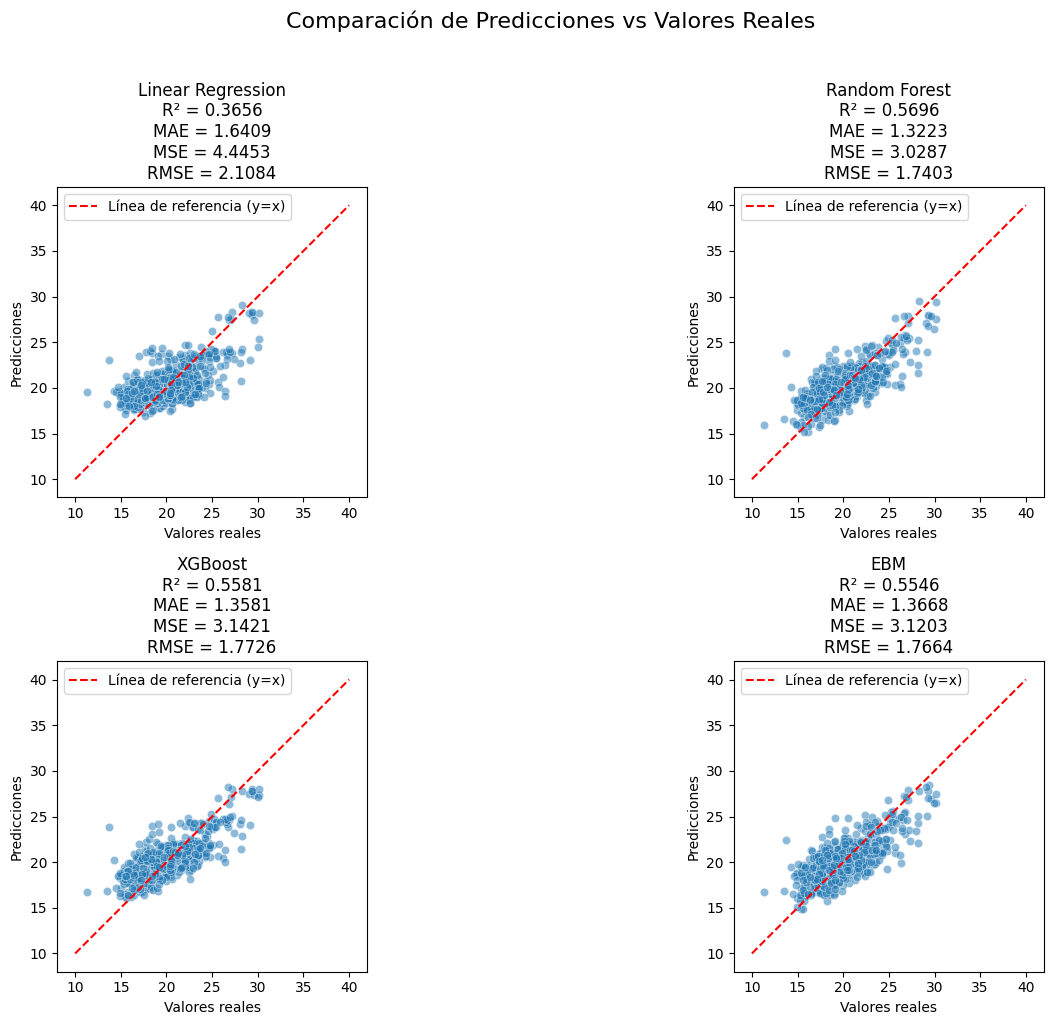

In [51]:
visualize_all_models_predictions(trained_models_catvisual, X_test_transformed, y_test, target_transformer)

In [52]:
if 'EBM' in results_catvisual:
    print("\nAnálisis del modelo EBM:")
    print("\nMétricas de rendimiento:")
    print(results_catvisual['EBM']['best_model_metrics'])
    
    # Analizar el modelo
    ebm_model = trained_models_catvisual['EBM']
    if use_gmm:
        feature_names = get_transformed_column_names(preprocessor, X_train_gmm, numerical_columns, categorical_columns) + gmm_features
    else:
        feature_names = get_transformed_column_names(preprocessor, X_train_gmm, numerical_columns, categorical_columns)
    global_exp, local_exp, feature_importance_catvisual = analyze_ebm_model(ebm_model, feature_names, X_test_transformed)


Análisis del modelo EBM:

Métricas de rendimiento:
{'rmse': np.float64(1.7664459742467575), 'mae': np.float64(1.3668226201347935), 'r2': 0.5538285181616801}

Información de diagnóstico:
Número de características en X_test: 48
Número de nombres de características: 48
Número total de scores (incluyendo interacciones): 53

Importancia de características principales según EBM:
PrcFresco: 0.0008
MinAcido1: 0.0053
MinAcido2: 0.0019
Temp: 0.0026
NumVaciados: 0.0029
TEMB1: 0.0019
TEMB2: 0.0028
TEMB3: 0.0027
TEMB4: 0.0047
TEMB5: 0.0021
TEMB6: 0.0026
TEMB7: 0.0005
TEMB8: 0.0001
PHB1: 0.0018
PHB2: 0.0019
PHB3: 0.0018
PHB4: 0.0030
PHB5: 0.0023
PHB6: 0.0025
PHB7: 0.0029
PHB8: 0.0005
PrcCat1: 0.0049
PrcCat2: 0.0038
PrcCat3: 0.0048
RelPromMPGRA_0: 0.0061
RelPromMPGRA_Prev_0: 0.0053
RelPromMPGRA_Prev2_0: 0.0074
PromHorasAlmacenamiento_0: 0.0058
PrcPesoLote_0: 0.0012
CodExtractora_emb_0: 0.0012
CodExtractora_emb_1: 0.0012
CodExtractora_emb_2: 0.0012
CodExtractora_emb_3: 0.0012
CodExtractora_emb_4: 0.0

In [53]:
# Calcula la importancia de las características categóricas
for emb_feature in categorical_columns:
    # Busca todas las claves en feature_importance que contengan el nombre de la variable categórica
    emb_keys = [key for key in feature_importance_catvisual.keys() if emb_feature in key]
    emb_keys = sorted(emb_keys, key=lambda x: int(x.split('_')[-1]))
    emb_importance = sum([feature_importance_catvisual[key] for key in emb_keys])
    feature_importance_catvisual[emb_feature] = emb_importance
    for key in emb_keys:
        del feature_importance_catvisual[key]

In [54]:
# Ordenar las características por importancia
feature_importance_catvisual = {k: v for k, v in sorted(feature_importance_catvisual.items(), key=lambda item: item[1], reverse=True)}
feature_importance_catvisual

{'CodProveedor_0': np.float64(0.04480584689429041),
 'CodExtractora': np.float64(0.007398903227567821),
 'RelPromMPGRA_Prev2_0': np.float64(0.007391277669915353),
 'RelPromMPGRA_0': np.float64(0.006061355453112412),
 'PromHorasAlmacenamiento_0': np.float64(0.005849485279831099),
 'RelPromMPGRA_Prev_0': np.float64(0.005294740123861186),
 'MinAcido1': np.float64(0.00527210538004992),
 'PrcCat1': np.float64(0.004932012913514998),
 'PrcCat3': np.float64(0.004812725640455118),
 'TEMB4': np.float64(0.0046847397701583185),
 'PrcCat2': np.float64(0.0038496362342118787),
 'PHB4': np.float64(0.002979336614403815),
 'NumVaciados': np.float64(0.0029440277394123778),
 'PHB7': np.float64(0.002885195850561306),
 'TEMB2': np.float64(0.002775947022635633),
 'TEMB3': np.float64(0.002666441499542908),
 'Temp': np.float64(0.0026134209717193855),
 'TEMB6': np.float64(0.002602805292203285),
 'PHB6': np.float64(0.0024591808986778197),
 'PHB5': np.float64(0.0022602198037250296),
 'TEMB5': np.float64(0.0021019

## Modelos simplificados

### Procesamiento de datos

In [62]:
# Definir columnas a utilizar
categorical_columns = []
for i in range(num_suppliers):
    categorical_columns += [f'CodProveedor_{i}']
    
numerical_columns = ['Temp']
for i in range(num_suppliers):
    numerical_columns += [f'RelPromMPGRA_{i}', f'RelPromMPGRA_Prev_{i}', f'RelPromMPGRA_Prev2_{i}']
target = 'Rendimiento'

# Reasigna las variables categóricas como categóricas
df_filtered[categorical_columns] = df_filtered[categorical_columns].astype('category')

# Cargar y dividir datos
print("\nCargando datos...")
X_train, X_test, y_train, y_test = load_and_prepare_data(df_filtered, target, categorical_columns, numerical_columns)

# Generar datos sintéticos

print("\nGenerando datos sintéticos...")
synthetic_generator = SyntheticDataGenerator(
    min_value=y_train.min(),
    max_value=y_train.max()
)

if n_synthetic_samples == 0:
    X_train_augmented, y_train_augmented = X_train, y_train
else:
    X_train_augmented, y_train_augmented = synthetic_generator.generate_synthetic_data(
        X_train, y_train,
        n_synthetic_samples=n_synthetic_samples,
        target=target
    )

if use_gmm:
    # Crear y aplicar el preprocesador GMM
    print("\nCreando preprocesador GMM...")
    gmm_preprocessor, X_train_gmm = create_gmm_preprocessing_pipeline(
        X_train_augmented, 
        categorical_columns=categorical_columns,
        numerical_columns=numerical_columns
    )

    # Transformar datos de prueba
    print("\nTransformando datos de prueba...")
    X_test_gmm = gmm_preprocessor.transform(X_test)
else:
    X_train_gmm, X_test_gmm = X_train_augmented, X_test

# Crear pipeline normal
preprocessor = create_preprocessing_pipeline(numerical_columns, categorical_columns)
target_transformer = TargetTransformer()


print("\nPreparando datos...")
X_train_transformed = preprocessor.fit_transform(X_train_gmm)
X_test_transformed = preprocessor.transform(X_test_gmm)

if use_gmm:
    gmm_features = [col for col in X_train_gmm.columns if col not in categorical_columns and col not in numerical_columns]
    X_train_transformed = np.concatenate((X_train_transformed, X_train_gmm[gmm_features].values), axis=1)
    X_test_transformed = np.concatenate((X_test_transformed, X_test_gmm[gmm_features].values), axis=1)


Cargando datos...

Generando datos sintéticos...

Preparando datos...
Dimensión de embedding para CodProveedor_0: 13 (n_categories: 42)


### Entrenamiento

In [63]:
# Entrenar y evaluar modelos
selected_models = [
    'Linear Regression',
    'Random Forest',
    'XGBoost',
    #'Gradient Boosting',
    'EBM',
    #'Neural Network'
]

trained_models, results = train_and_evaluate_models(
    X_train_transformed, X_test_transformed, y_train_augmented, y_test, target_transformer, selected_models
)


LINEAR REGRESSION

Entrenando Linear Regression:
CV RMSE scores: [0.12210853 0.12795959 0.12542628 0.12262219 0.12462382]
Mean CV RMSE: 0.1245

Métricas del mejor modelo:
RMSE: 2.5984
MAE: 1.9713
R2: 0.0346

Tiempo de entrenamiento: 2.82 segundos

RANDOM FOREST

Entrenando Random Forest:
CV RMSE scores: [0.09219395 0.0932195  0.09282479 0.09863832 0.09229193]
Mean CV RMSE: 0.0938

Métricas del mejor modelo:
RMSE: 1.8535
MAE: 1.3993
R2: 0.5087

Tiempo de entrenamiento: 5.59 segundos

XGBOOST

Entrenando XGBoost:
CV RMSE scores: [0.09631569 0.0992551  0.0969757  0.10154062 0.09953892]
Mean CV RMSE: 0.0987

Métricas del mejor modelo:
RMSE: 1.9593
MAE: 1.5084
R2: 0.4511

Tiempo de entrenamiento: 1.36 segundos

EBM

Entrenando EBM:
CV RMSE scores: [0.09290435 0.09592456 0.09528651 0.10045712 0.09646397]
Mean CV RMSE: 0.0962

Métricas del mejor modelo:
RMSE: 1.8611
MAE: 1.4059
R2: 0.5048

Tiempo de entrenamiento: 8.74 segundos


### Análisis de resultados

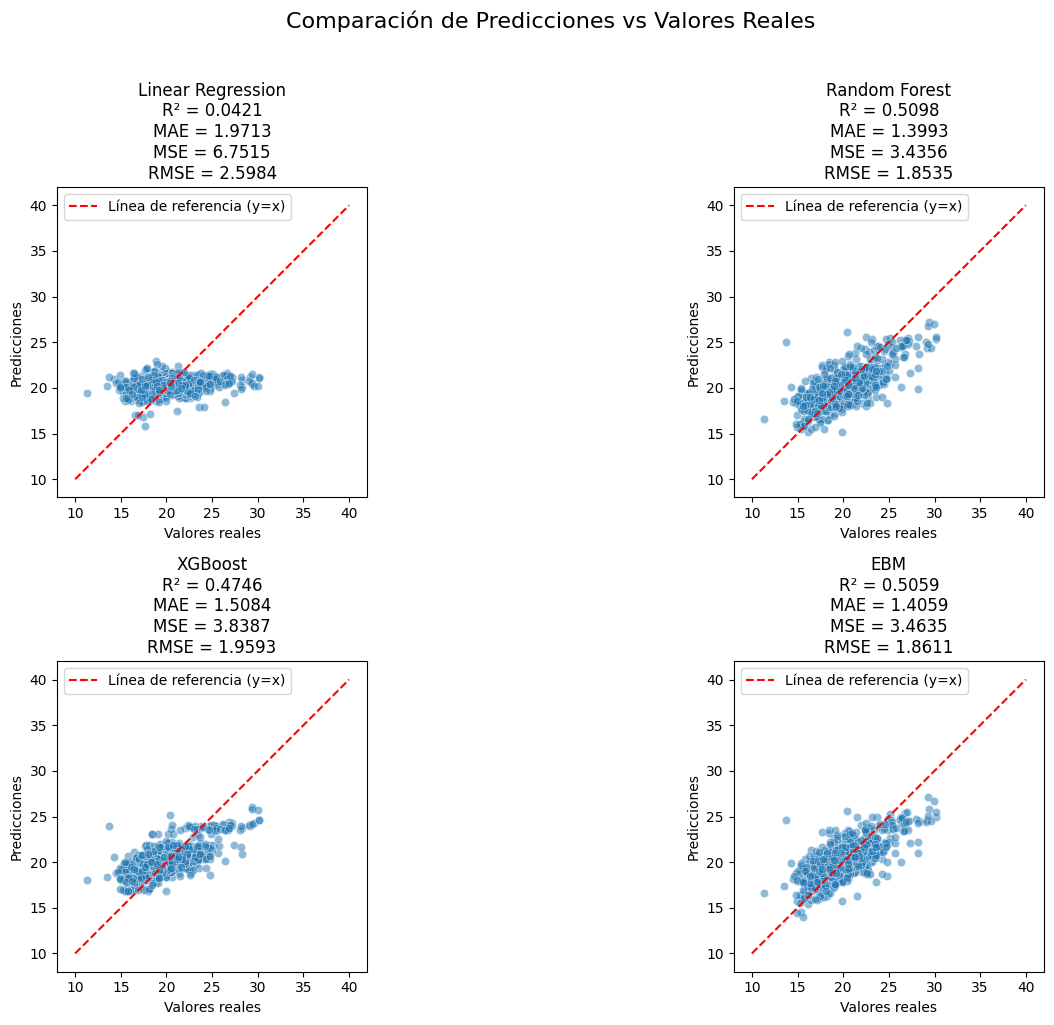

In [64]:
visualize_all_models_predictions(trained_models, X_test_transformed, y_test, target_transformer)

In [65]:
if 'EBM' in results:
    print("\nAnálisis del modelo EBM:")
    print("\nMétricas de rendimiento:")
    print(results['EBM']['best_model_metrics'])
    
    # Analizar el modelo
    ebm_model = trained_models['EBM']
    if use_gmm:
        feature_names = get_transformed_column_names(preprocessor, X_train_gmm, numerical_columns, categorical_columns) + gmm_features
    else:
        feature_names = get_transformed_column_names(preprocessor, X_train_gmm, numerical_columns, categorical_columns)
    global_exp, local_exp, feature_importance = analyze_ebm_model(ebm_model, feature_names, X_test_transformed)


Análisis del modelo EBM:

Métricas de rendimiento:
{'rmse': np.float64(1.8610534113354915), 'mae': np.float64(1.4058926144118773), 'r2': 0.5047565231658462}

Información de diagnóstico:
Número de características en X_test: 17
Número de nombres de características: 17
Número total de scores (incluyendo interacciones): 23

Importancia de características principales según EBM:
Temp: 0.0049
RelPromMPGRA_0: 0.0130
RelPromMPGRA_Prev_0: 0.0088
RelPromMPGRA_Prev2_0: 0.0099
CodProveedor_0_emb_0: 0.0051
CodProveedor_0_emb_1: 0.0053
CodProveedor_0_emb_2: 0.0071
CodProveedor_0_emb_3: 0.0046
CodProveedor_0_emb_4: 0.0040
CodProveedor_0_emb_5: 0.0079
CodProveedor_0_emb_6: 0.0047
CodProveedor_0_emb_7: 0.0053
CodProveedor_0_emb_8: 0.0050
CodProveedor_0_emb_9: 0.0050
CodProveedor_0_emb_10: 0.0063
CodProveedor_0_emb_11: 0.0070
CodProveedor_0_emb_12: 0.0059

Términos de interacción detectados:
Interacción 0: 0.0041
Interacción 1: 0.0037
Interacción 2: 0.0049
Interacción 3: 0.0055
Interacción 4: 0.0051
Int

In [66]:
# Calcula la importancia de las características categóricas
for emb_feature in categorical_columns:
    # Busca todas las claves en feature_importance que contengan el nombre de la variable categórica
    emb_keys = [key for key in feature_importance.keys() if emb_feature in key]
    emb_keys = sorted(emb_keys, key=lambda x: int(x.split('_')[-1]))
    emb_importance = sum([feature_importance[key] for key in emb_keys])
    feature_importance[emb_feature] = emb_importance
    for key in emb_keys:
        del feature_importance[key]

In [67]:
# Ordenar las características por importancia
feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)}
feature_importance

{'CodProveedor_0': np.float64(0.07338674089053683),
 'RelPromMPGRA_0': np.float64(0.012981414591212504),
 'RelPromMPGRA_Prev2_0': np.float64(0.00986271318235928),
 'RelPromMPGRA_Prev_0': np.float64(0.008752033972890242),
 'Temp': np.float64(0.0048766428258293)}

### Optimización de hiperparámetros

In [68]:
n_trials = 300
best_params_simple = {}

start_time = time.time()
print("Optimizando Random Forest...")
best_params_simple['random_forest'] = optimize_random_forest(X_train_transformed, y_train_augmented, X_test_transformed, y_test, target_transformer, n_trials)
random_forest_time = time.time() - start_time

start_time = time.time()
print("\nOptimizando XGBoost...")
best_params_simple['xgboost'] = optimize_xgboost(X_train_transformed, y_train_augmented, X_test_transformed, y_test, target_transformer, n_trials)
xgboost_time = time.time() - start_time

start_time = time.time()
print("\nOptimizando EBM...")
best_params_simple['ebm'] = optimize_ebm(X_train_transformed, y_train_augmented, X_test_transformed, y_test, target_transformer, n_trials)
ebm_time = time.time() - start_time

Optimizando Random Forest...

Probando parámetros RF: {'n_estimators': 2412, 'max_depth': 24, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'log2'}
RMSE: 1.8425

Probando parámetros RF: {'n_estimators': 2120, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
RMSE: 2.0512

Probando parámetros RF: {'n_estimators': 1657, 'max_depth': 8, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_features': None}
RMSE: 1.8890

Probando parámetros RF: {'n_estimators': 2514, 'max_depth': 8, 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
RMSE: 1.9158

Probando parámetros RF: {'n_estimators': 2879, 'max_depth': 14, 'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': 'log2'}
RMSE: 1.8685

Probando parámetros RF: {'n_estimators': 2935, 'max_depth': 16, 'min_samples_split': 19, 'min_samples_leaf': 13, 'max_features': 'sqrt'}
RMSE: 1.9239

Probando parámetros RF: {'n_estimators': 778, 'max_depth': 12, 'min_samples

In [69]:
print("\nTiempo total de optimización:")
print(f"Random Forest: {random_forest_time:.2f} segundos")
print(f"XGBoost: {xgboost_time:.2f} segundos")
print(f"EBM: {ebm_time:.2f} segundos")


Tiempo total de optimización:
Random Forest: 1544.43 segundos
XGBoost: 622.84 segundos
EBM: 2473.07 segundos


#### Entrenamiento del modelo con hiperparámetros

In [70]:
trained_models_simple, results_simple = train_and_evaluate_models(
    X_train_transformed, X_test_transformed, y_train_augmented, y_test, target_transformer, selected_models, best_params_simple
)


LINEAR REGRESSION

Entrenando Linear Regression:
CV RMSE scores: [0.12210853 0.12795959 0.12542628 0.12262219 0.12462382]
Mean CV RMSE: 0.1245

Métricas del mejor modelo:
RMSE: 2.5984
MAE: 1.9713
R2: 0.0346

Tiempo de entrenamiento: 0.02 segundos

RANDOM FOREST

Entrenando Random Forest:
CV RMSE scores: [0.09243165 0.09190824 0.09207647 0.09877429 0.0916404 ]
Mean CV RMSE: 0.0934

Métricas del mejor modelo:
RMSE: 1.8587
MAE: 1.4074
R2: 0.5060

Tiempo de entrenamiento: 8.30 segundos

XGBOOST

Entrenando XGBoost:
CV RMSE scores: [0.09310542 0.09317895 0.09175733 0.09962452 0.09341316]
Mean CV RMSE: 0.0942

Métricas del mejor modelo:
RMSE: 1.8865
MAE: 1.4305
R2: 0.4911

Tiempo de entrenamiento: 1.40 segundos

EBM

Entrenando EBM:
CV RMSE scores: [0.09382929 0.0959531  0.09457137 0.09802729 0.09657124]
Mean CV RMSE: 0.0958

Métricas del mejor modelo:
RMSE: 1.8759
MAE: 1.4136
R2: 0.4968

Tiempo de entrenamiento: 15.22 segundos


#### Análisis de resultados

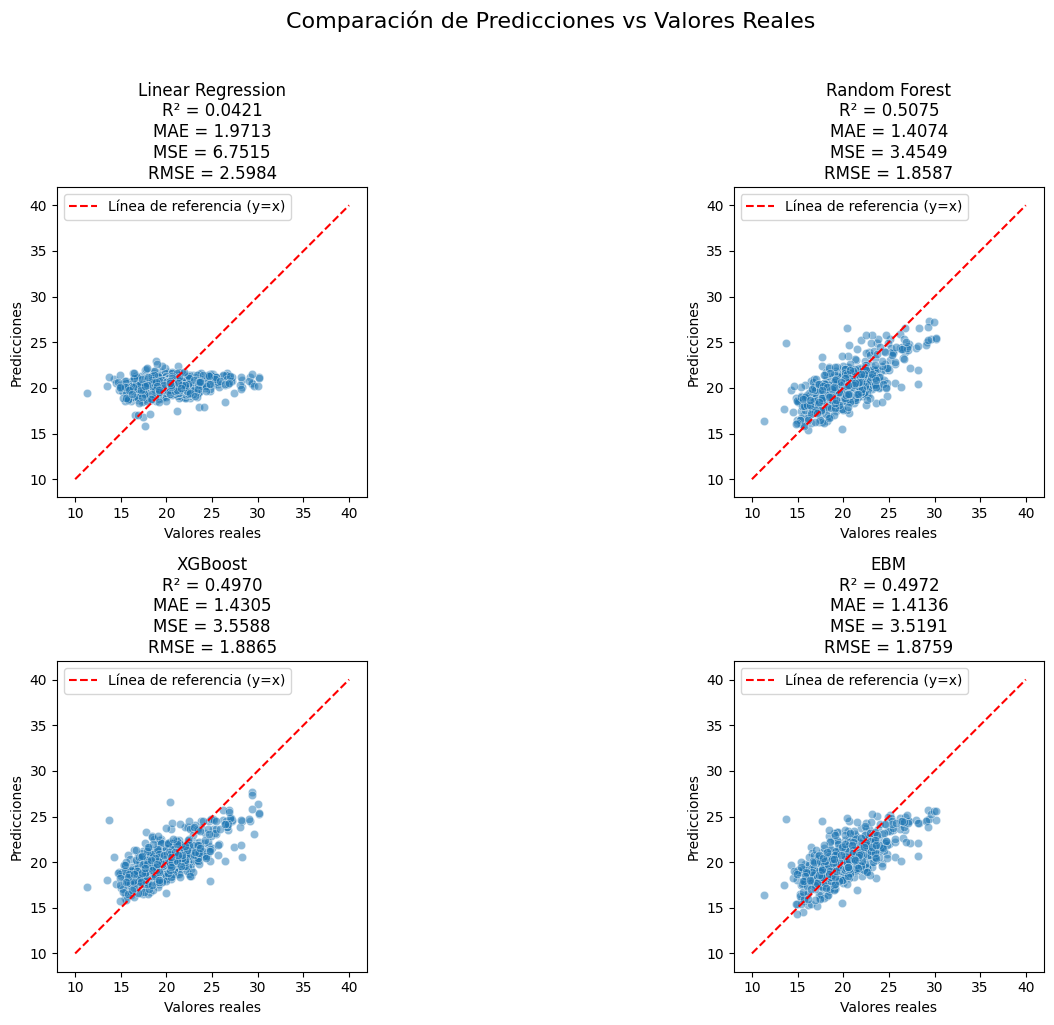

In [71]:
visualize_all_models_predictions(trained_models_simple, X_test_transformed, y_test, target_transformer)

In [72]:
if 'EBM' in results_simple:
    print("\nAnálisis del modelo EBM:")
    print("\nMétricas de rendimiento:")
    print(results_simple['EBM']['best_model_metrics'])
    
    # Analizar el modelo
    ebm_model = trained_models_simple['EBM']
    if use_gmm:
        feature_names = get_transformed_column_names(preprocessor, X_train_gmm, numerical_columns, categorical_columns) + gmm_features
    else:
        feature_names = get_transformed_column_names(preprocessor, X_train_gmm, numerical_columns, categorical_columns)
    global_exp, local_exp, feature_importance_simple = analyze_ebm_model(ebm_model, feature_names, X_test_transformed)


Análisis del modelo EBM:

Métricas de rendimiento:
{'rmse': np.float64(1.8759294915993232), 'mae': np.float64(1.4136421975447044), 'r2': 0.49680755581814584}

Información de diagnóstico:
Número de características en X_test: 17
Número de nombres de características: 17
Número total de scores (incluyendo interacciones): 22

Importancia de características principales según EBM:
Temp: 0.0064
RelPromMPGRA_0: 0.0125
RelPromMPGRA_Prev_0: 0.0106
RelPromMPGRA_Prev2_0: 0.0119
CodProveedor_0_emb_0: 0.0048
CodProveedor_0_emb_1: 0.0052
CodProveedor_0_emb_2: 0.0053
CodProveedor_0_emb_3: 0.0042
CodProveedor_0_emb_4: 0.0039
CodProveedor_0_emb_5: 0.0060
CodProveedor_0_emb_6: 0.0050
CodProveedor_0_emb_7: 0.0049
CodProveedor_0_emb_8: 0.0048
CodProveedor_0_emb_9: 0.0043
CodProveedor_0_emb_10: 0.0050
CodProveedor_0_emb_11: 0.0042
CodProveedor_0_emb_12: 0.0048

Términos de interacción detectados:
Interacción 0: 0.0046
Interacción 1: 0.0044
Interacción 2: 0.0048
Interacción 3: 0.0045
Interacción 4: 0.0052

T

In [73]:
# Calcula la importancia de las características categóricas
for emb_feature in categorical_columns:
    # Busca todas las claves en feature_importance que contengan el nombre de la variable categórica
    emb_keys = [key for key in feature_importance_simple.keys() if emb_feature in key]
    emb_keys = sorted(emb_keys, key=lambda x: int(x.split('_')[-1]))
    emb_importance = sum([feature_importance_simple[key] for key in emb_keys])
    feature_importance_simple[emb_feature] = emb_importance
    for key in emb_keys:
        del feature_importance_simple[key]

In [74]:
# Ordenar las características por importancia
feature_importance_simple = {k: v for k, v in sorted(feature_importance_simple.items(), key=lambda item: item[1], reverse=True)}
feature_importance_simple

{'CodProveedor_0': np.float64(0.06248015114728165),
 'RelPromMPGRA_0': np.float64(0.012545838376801129),
 'RelPromMPGRA_Prev2_0': np.float64(0.011869690796539887),
 'RelPromMPGRA_Prev_0': np.float64(0.010607739140586804),
 'Temp': np.float64(0.0064368239916811785)}

## Parámetros optimizados

In [77]:
best_params_catvisual

{'random_forest': {'n_estimators': 2957,
  'max_depth': 22,
  'min_samples_split': 3,
  'min_samples_leaf': 3,
  'max_features': None},
 'xgboost': {'n_estimators': 1775,
  'max_depth': 19,
  'learning_rate': 0.02249397623766182,
  'min_child_weight': 8,
  'subsample': 0.8675248901986609,
  'colsample_bytree': 0.8440476028201204,
  'gamma': 0.053240585260582896,
  'reg_alpha': 0.09351148272147002,
  'reg_lambda': 1.2601464188256695},
 'ebm': {'outer_bags': 7,
  'inner_bags': 4,
  'learning_rate': 0.0019014822382853957,
  'max_rounds': 7814,
  'min_samples_leaf': 27,
  'max_leaves': 31,
  'interactions': 5}}

In [78]:
best_params_simple

{'random_forest': {'n_estimators': 2427,
  'max_depth': 16,
  'min_samples_split': 15,
  'min_samples_leaf': 2,
  'max_features': None},
 'xgboost': {'n_estimators': 2925,
  'max_depth': 22,
  'learning_rate': 0.06503699158820368,
  'min_child_weight': 7,
  'subsample': 0.7005566408513879,
  'colsample_bytree': 0.8667663837073387,
  'gamma': 0.05073441831588738,
  'reg_alpha': 0.051335066298862864,
  'reg_lambda': 1.6340104999571767},
 'ebm': {'outer_bags': 12,
  'inner_bags': 15,
  'learning_rate': 0.043027557726215374,
  'max_rounds': 6853,
  'min_samples_leaf': 17,
  'max_leaves': 22,
  'interactions': 5}}